# Next_Car ! : A used car pricing engine

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**NextCar is a used car pricing tool to help car buyers and sellers talk about price realistic manner. A study from 2021 Cox Automotive Car Buying Journey (https://www.coxautoinc.com/wp-content/uploads/2022/01/2021-Car-Buyer-Journey-Study-Overview.pdf ), mentions that shoppers are looking for a fair car price not only for new vehicles, but also for used vehicles and the vehicles they currently own. This used car pricing engine is designed to induce frictionless transaction experience between buyers and sellers.**

**Given the attributes of a used car, NextCar regression model application will need to predict the price or market valuation of a used car for sellers and buyers alike with reasonable accuracy. This application is targeted at used car sellers (individual or used car dealers  and individual buyers.** 


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**The data used in this project was provided in the application 2 starter package. The original dataset is from Kaggle, that contained information on 3 million used cars. The provided dataset contains information on 4,26,880 cars to ensure speed of processing. It contains most all relevant information a Craigslist used car advertisement, provides on car sales like price, condition, manufacturer etc., for a total of 18 features associated with a used car listing. The following sections will delve deeper into the dataset and get some exploratory insights**

In [1]:
import time
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno


In [3]:

from feature_engine.encoding import OneHotEncoder,OrdinalEncoder,rare_label,DecisionTreeEncoder
from yellowbrick.model_selection import FeatureImportances 

In [4]:
from scipy import stats
from scipy.stats import chi2_contingency
from dython import nominal
from dython.nominal import associations
import researchpy

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from tpot import TPOTRegressor
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.model_selection import cross_val_score,KFold
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

In [6]:
from sklearn import set_config
set_config(display='diagram')

In [7]:
originaldf=pd.read_csv("./data/vehicles.csv")

In [8]:
originaldf.shape

(426880, 18)

In [9]:
df = originaldf.sample(frac=0.10, random_state = 1)
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
154871,7308389161,south bend / michiana,7500,2012.0,mazda,3,excellent,NaN,gas,75011.0,rebuilt,automatic,NaN,fwd,compact,hatchback,silver,in
406469,7311927750,olympic peninsula,25999,2019.0,dodge,charger,NaN,6 cylinders,gas,45930.0,clean,automatic,2C3CDXBG1KH657722,rwd,NaN,sedan,custom,wa
252241,7305320997,central NJ,22645,2014.0,bmw,428 i,NaN,NaN,gas,77514.0,clean,automatic,WBA3V5C58EP747991,NaN,NaN,other,black,nj
29757,7303142676,imperial county,0,2015.0,chevrolet,silverado 1500,NaN,8 cylinders,gas,93775.0,clean,automatic,1GCVKREC7FZ420429,4wd,NaN,truck,NaN,ca
47657,7306374379,redding,21997,2007.0,toyota,4runner sport edition 4dr suv 1-oregon owner*r...,NaN,6 cylinders,gas,171525.0,clean,automatic,JTEBU14RX78083407,4wd,NaN,SUV,white,ca


In [10]:
df.shape

(42688, 18)

In [11]:
df.describe()

,id,price,year,odometer
count,4.268800e+04,4.268800e+04,42579.000000,4.225700e+04
mean,7.311444e+09,1.503687e+05,2011.249419,9.980050e+04
std,4.507152e+06,1.697124e+07,9.387330,2.515770e+05
min,7.213844e+09,0.000000e+00,1901.000000,0.000000e+00
25%,7.308030e+09,5.888000e+03,2008.000000,3.761800e+04
50%,7.312538e+09,1.370000e+04,2014.000000,8.600000e+04
75%,7.315236e+09,2.599500e+04,2017.000000,1.339080e+05
max,7.317094e+09,3.009549e+09,2022.000000,1.000000e+07


In [12]:
df.corr()

,id,price,year,odometer
id,1.000000,0.000349,-0.059021,0.001786
price,0.000349,1.000000,0.001258,-0.001567
year,-0.059021,0.001258,1.000000,-0.145507
odometer,0.001786,-0.001567,-0.145507,1.000000


In [13]:
df[['price','year','odometer']].corr()

,price,year,odometer
price,1.000000,0.001258,-0.001567
year,0.001258,1.000000,-0.145507
odometer,-0.001567,-0.145507,1.000000


<AxesSubplot:xlabel='odometer', ylabel='price'>

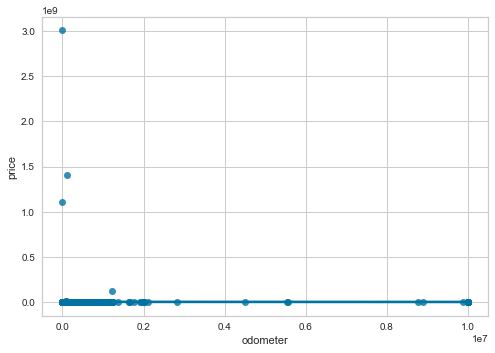

In [14]:
sns.regplot(x="odometer",y="price",data=df)

<AxesSubplot:xlabel='year', ylabel='price'>

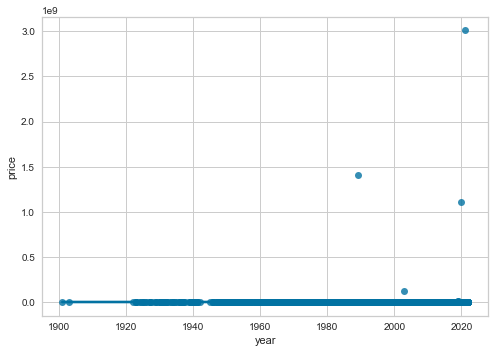

In [15]:
sns.regplot(x="year",y="price",data=df)

<AxesSubplot:xlabel='year', ylabel='odometer'>

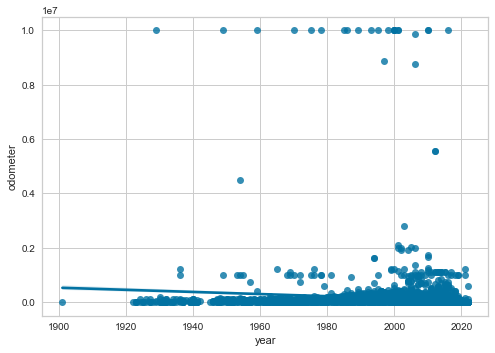

In [16]:
sns.regplot(x="year",y="odometer",data=df)

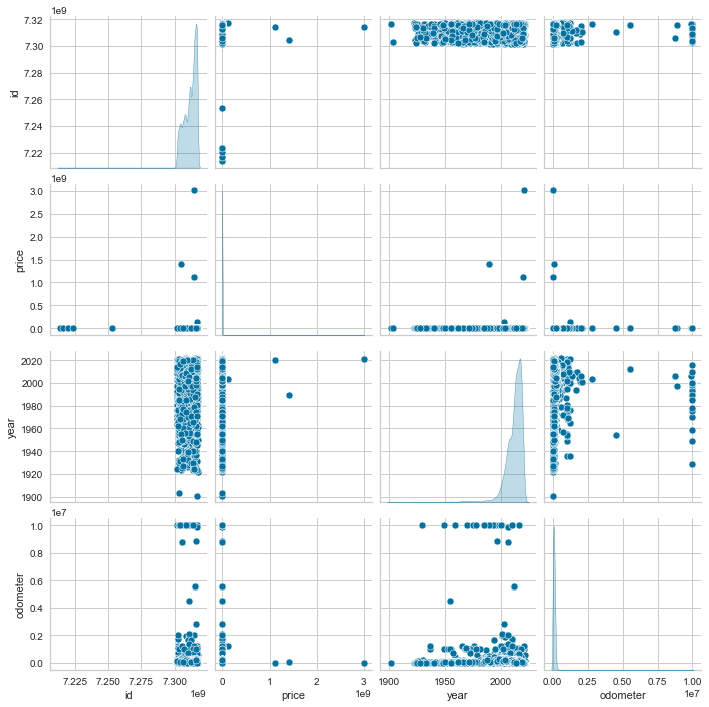

In [17]:
#creating charts for data understanding
sns.pairplot(data = df, diag_kind = 'kde')

In [18]:
df.isnull().sum().to_frame()

,0
id,0
region,0
price,0
year,109
manufacturer,1696
model,525
condition,17439
cylinders,18003
fuel,306
odometer,431


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,42688.0,7.311444e+09,4.507152e+06,7.213844e+09,7.308030e+09,7.312538e+09,7.315236e+09,7.317094e+09
price,42688.0,1.503687e+05,1.697124e+07,0.000000e+00,5.888000e+03,1.370000e+04,2.599500e+04,3.009549e+09
year,42579.0,2.011249e+03,9.387330e+00,1.901000e+03,2.008000e+03,2.014000e+03,2.017000e+03,2.022000e+03
odometer,42257.0,9.980050e+04,2.515770e+05,0.000000e+00,3.761800e+04,8.600000e+04,1.339080e+05,1.000000e+07


In [20]:
df.describe(include=["object"]).T

,count,unique,top,freq
region,42688,403,columbus,381
manufacturer,40992,41,ford,7220
model,42163,8453,f-150,772
condition,25249,6,good,12114
cylinders,24685,8,6 cylinders,9285
fuel,42382,5,gas,35692
title_status,41790,6,clean,40489
transmission,42444,3,automatic,33772
VIN,26731,20795,1FTER1EH1LLA36301,31
drive,29652,3,4wd,13144


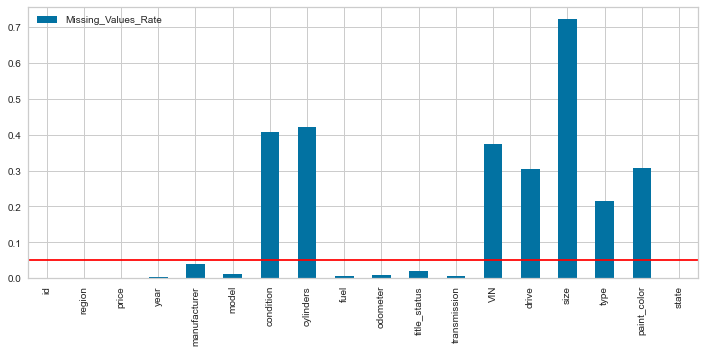

In [21]:
pd.DataFrame(df.isnull().sum()/len(df),columns=["Missing_Values_Rate"]).plot.bar(figsize=(12,5));
plt.axhline(0.05,color="red");
plt.show()

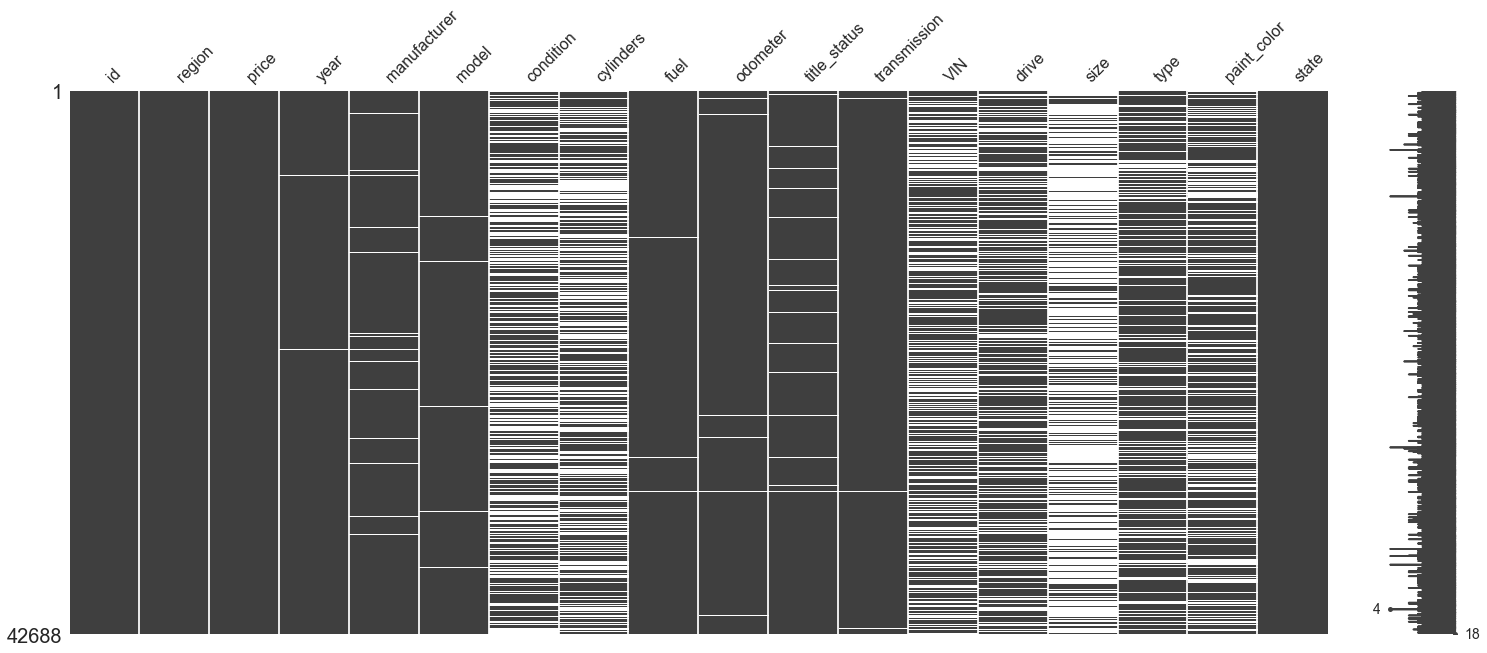

In [22]:
msno.matrix(df);

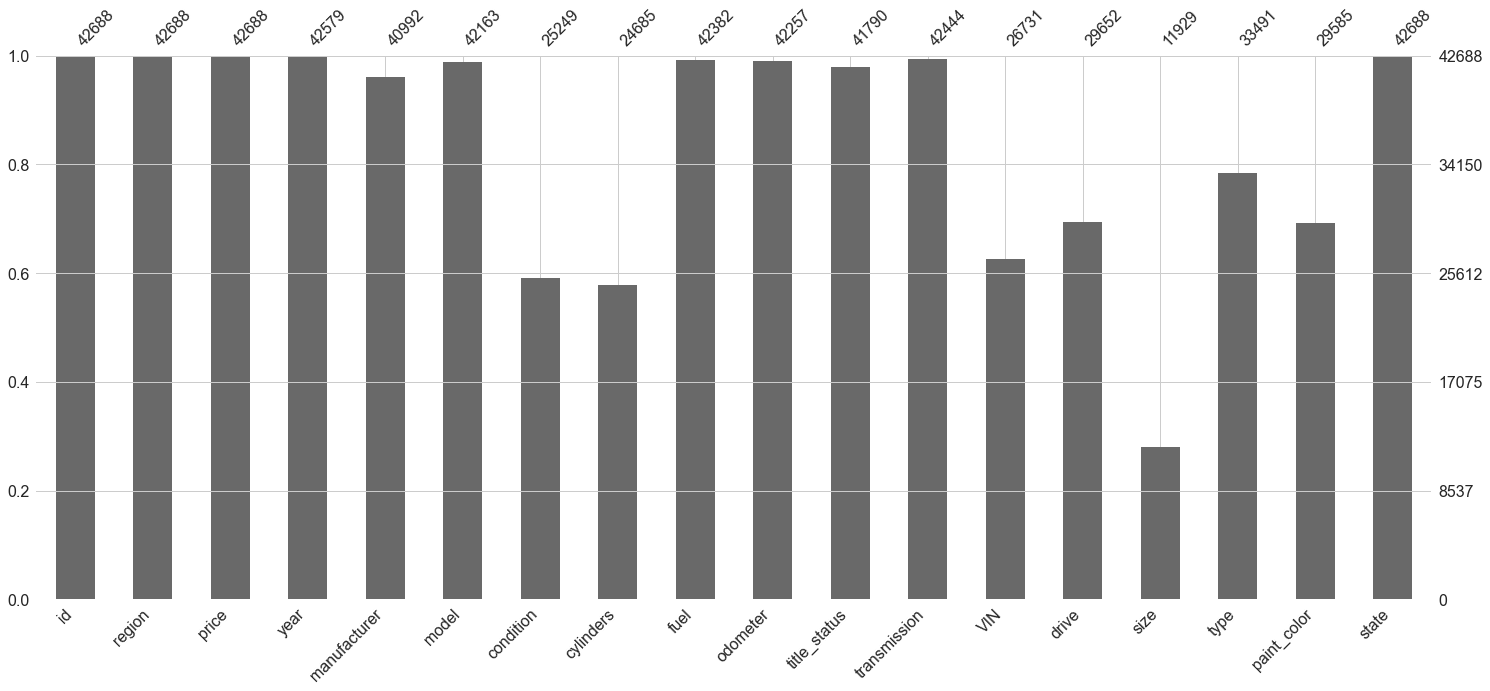

In [23]:
msno.bar(df);

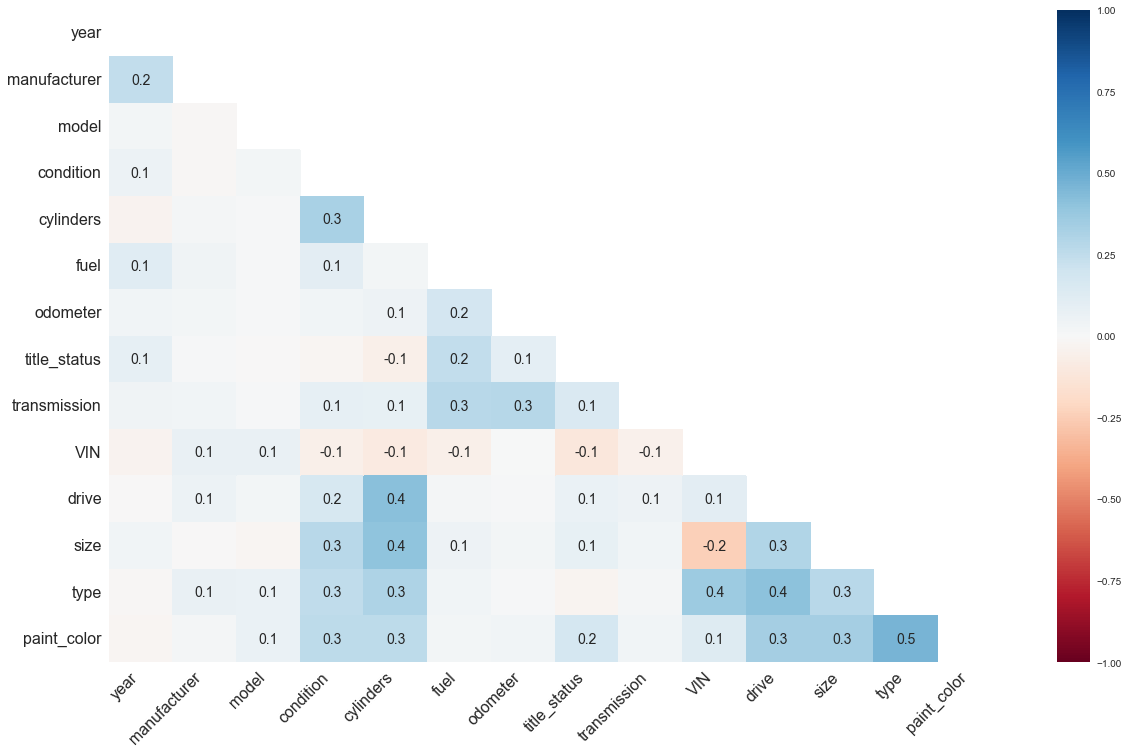

In [24]:
msno.heatmap(df);

**Perform chi2 test for missing values** 

In [25]:
#code fragement in this cell is a derivative work inspired by the ideas presented in this article
#Reference Url: https://predictivehacks.com/how-to-run-chi-square-test-in-python/

#contingency= pd.crosstab(df['state'], df['manufacturer'])
#contingency_pct = pd.crosstab(df['state'], df['manufacturer'], normalize='index')
#contingency_pct

In [26]:

# I want to test if there is a statistically significant difference between size, model, manufacturers (Toyota, Ford etc.) 
#  types, condition etc. 

column_to_test="size"

for column in df.select_dtypes(include=["object"]).columns :

        crosstab = pd.crosstab(df[column], df[column_to_test])
        
        chi_square_value,pval,degrees_of_freedom,contingency_table=stats.chi2_contingency(crosstab)  
        print(column,column_to_test)
        print('chi_square_value : ',chi_square_value,'\np value : ',pval)
        print('degrees of freedom : ',degrees_of_freedom,'\n')
        
        if pval <0.05:
            print("H0 Null Hypothesis is rejected\n")
        else:
            print("H0 Null Hypothesis is accepted\n")


region size
chi_square_value :  1684.7636526232043 
p value :  5.020721794073018e-23
degrees of freedom :  1149 

H0 Null Hypothesis is rejected

manufacturer size
chi_square_value :  2170.1956313057362 
p value :  0.0
degrees of freedom :  117 

H0 Null Hypothesis is rejected

model size
chi_square_value :  18469.953434902294 
p value :  0.0
degrees of freedom :  9939 

H0 Null Hypothesis is rejected

condition size
chi_square_value :  39.75733370605701 
p value :  0.0004933583798169245
degrees of freedom :  15 

H0 Null Hypothesis is rejected

cylinders size
chi_square_value :  3214.011191290666 
p value :  0.0
degrees of freedom :  21 

H0 Null Hypothesis is rejected

fuel size
chi_square_value :  805.2111284661737 
p value :  1.2625725450075811e-164
degrees of freedom :  12 

H0 Null Hypothesis is rejected

title_status size
chi_square_value :  26.536611463719897 
p value :  0.032746690240130605
degrees of freedom :  15 

H0 Null Hypothesis is rejected

transmission size
chi_square

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [27]:
#Remove rows that contains NULL values

df2=df.dropna()
df2.shape

(3519, 18)

In [28]:
df2.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
101063,7313859321,lakeland,9500,2005.0,ram,2500,good,8 cylinders,gas,113275.0,clean,automatic,3D7KS28D15G813247,4wd,full-size,truck,silver,fl
233416,7311594580,charlotte,8865,2013.0,volkswagen,jetta se 2.5,excellent,5 cylinders,gas,62166.0,rebuilt,automatic,3VWDP7AJ5DM431480,fwd,mid-size,sedan,brown,nc
280920,7311701252,syracuse,7995,2007.0,toyota,rav4,excellent,4 cylinders,gas,134784.0,clean,automatic,JTMBD31VX75073611,4wd,full-size,SUV,silver,ny
386054,7311476708,salt lake city,27990,2011.0,ford,f-750,good,6 cylinders,diesel,123622.0,clean,automatic,3FRXF7FL5BV557295,rwd,full-size,truck,white,ut
147724,7314851141,"st louis, MO",3000,2004.0,lexus,es 330,excellent,6 cylinders,gas,191481.0,clean,automatic,JTHBA30G040004025,fwd,mid-size,sedan,silver,il


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3519 entries, 101063 to 52258
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3519 non-null   int64  
 1   region        3519 non-null   object 
 2   price         3519 non-null   int64  
 3   year          3519 non-null   float64
 4   manufacturer  3519 non-null   object 
 5   model         3519 non-null   object 
 6   condition     3519 non-null   object 
 7   cylinders     3519 non-null   object 
 8   fuel          3519 non-null   object 
 9   odometer      3519 non-null   float64
 10  title_status  3519 non-null   object 
 11  transmission  3519 non-null   object 
 12  VIN           3519 non-null   object 
 13  drive         3519 non-null   object 
 14  size          3519 non-null   object 
 15  type          3519 non-null   object 
 16  paint_color   3519 non-null   object 
 17  state         3519 non-null   object 
dtypes: float64(2), int64(2

In [30]:
df2.odometer=df2.odometer.astype(int)
df2.year=df2.year.astype(int)
df2.dtypes

id               int64
region          object
price            int64
year             int32
manufacturer    object
model           object
condition       object
cylinders       object
fuel            object
odometer         int32
title_status    object
transmission    object
VIN             object
drive           object
size            object
type            object
paint_color     object
state           object
dtype: object

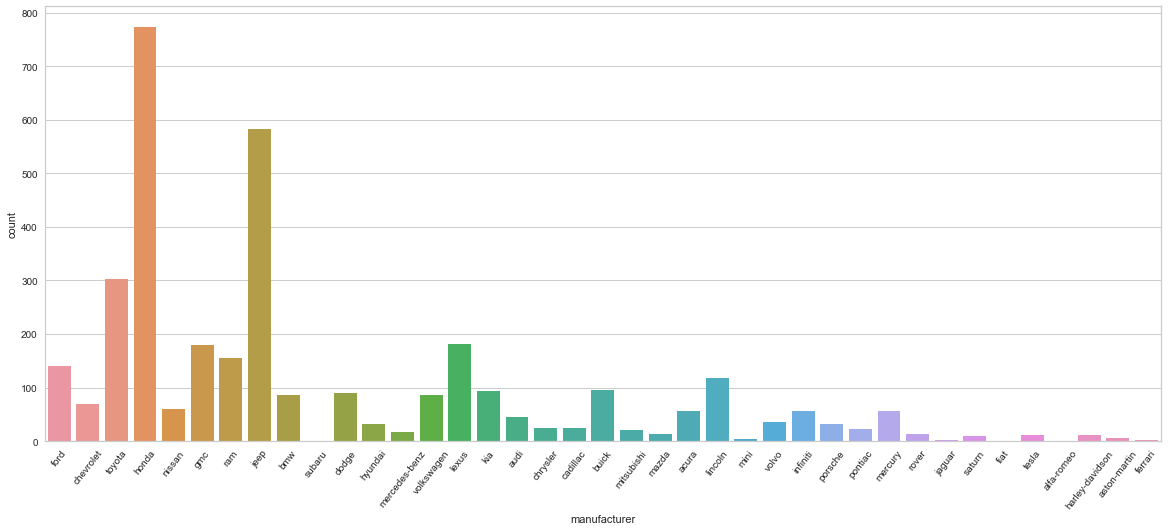

In [31]:
plt.figure(figsize=(20,8));
sns.countplot(df2.manufacturer).set_xticklabels(labels=df2.manufacturer.value_counts().index ,rotation=52);

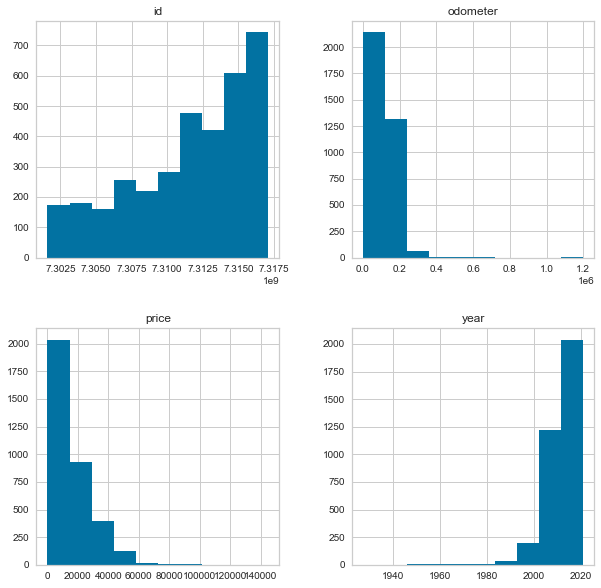

In [32]:
df2.hist(figsize=(10,10));

In [33]:
def diagnostic_plots(df2, variable):
    
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 3, 1)
    sns.distplot(df2[variable], bins=30,kde_kws={'bw': 1.5})
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df2[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df2[variable])
    
    
    plt.title('Boxplot')
    
    plt.show()
    
    
to_plot_labels=df2.manufacturer.value_counts().nlargest(10).index

************************************************************ FORD ************************************************************
DescribeResult(nobs=773, minmax=(0, 99700), mean=20769.33376455369, variance=246761791.33146212, skewness=1.1204237052434958, kurtosis=2.1326385614264405)


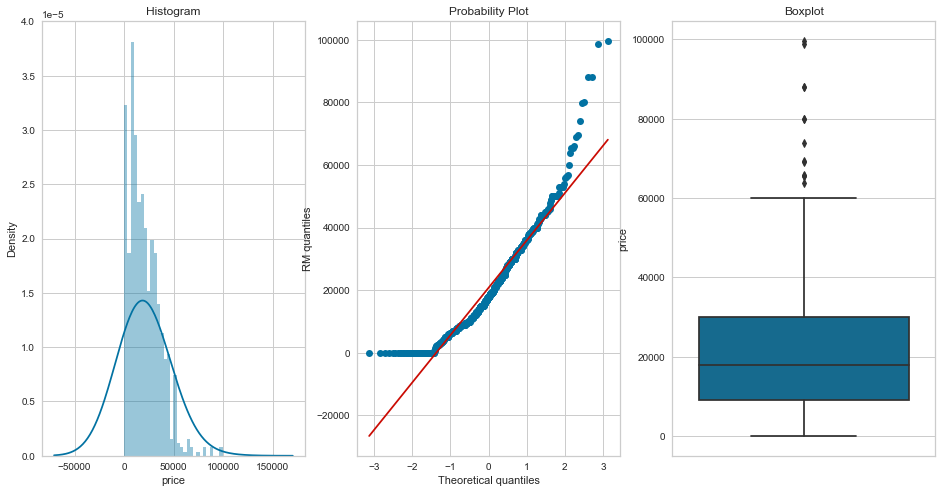

************************************************************ CHEVROLET ************************************************************
DescribeResult(nobs=583, minmax=(0, 61995), mean=16916.677530017154, variance=168354195.4044255, skewness=0.8956753699701693, kurtosis=0.347941538584132)


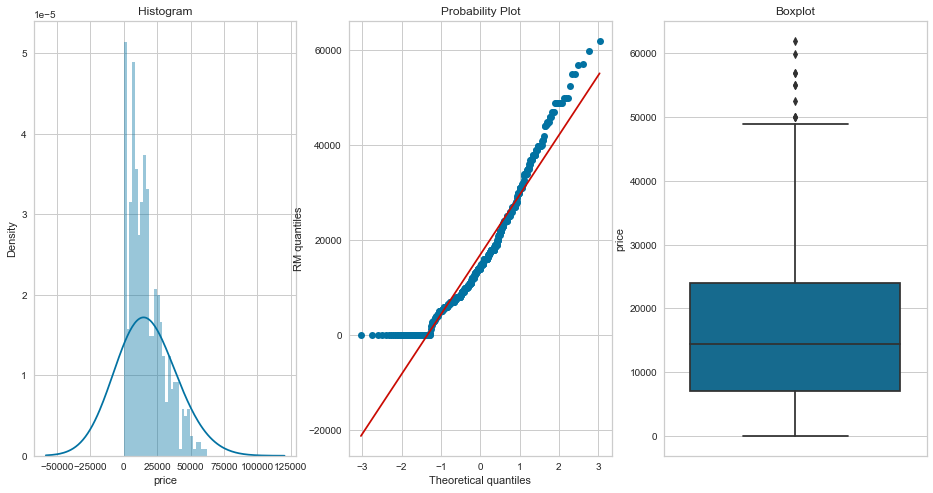

************************************************************ TOYOTA ************************************************************
DescribeResult(nobs=302, minmax=(0, 90978), mean=13254.91059602649, variance=132271854.61324285, skewness=2.018549465291794, kurtosis=7.099555110772378)


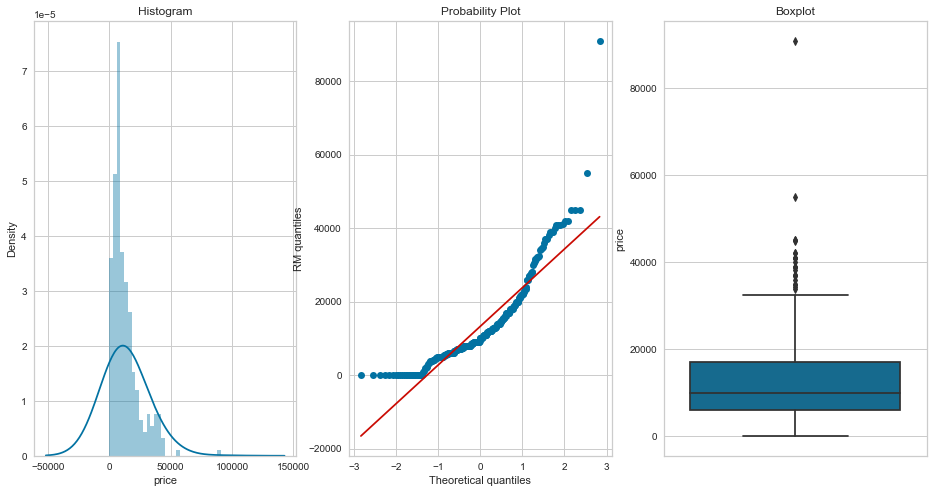

************************************************************ HONDA ************************************************************
DescribeResult(nobs=182, minmax=(0, 36990), mean=10055.417582417582, variance=48067883.30532451, skewness=1.323225332625335, kurtosis=2.926710437744795)


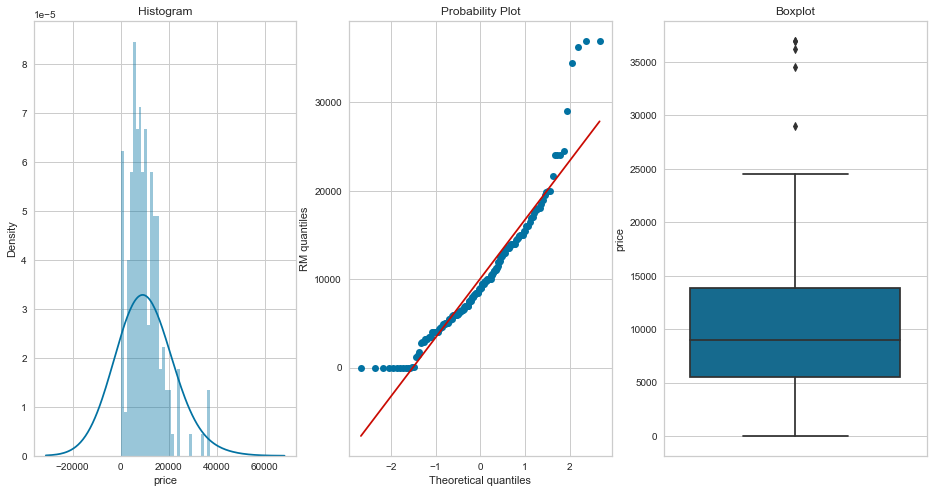

************************************************************ NISSAN ************************************************************
DescribeResult(nobs=180, minmax=(0, 50345), mean=11461.522222222222, variance=59803389.68106765, skewness=1.0045276434132318, kurtosis=2.5225847918680184)


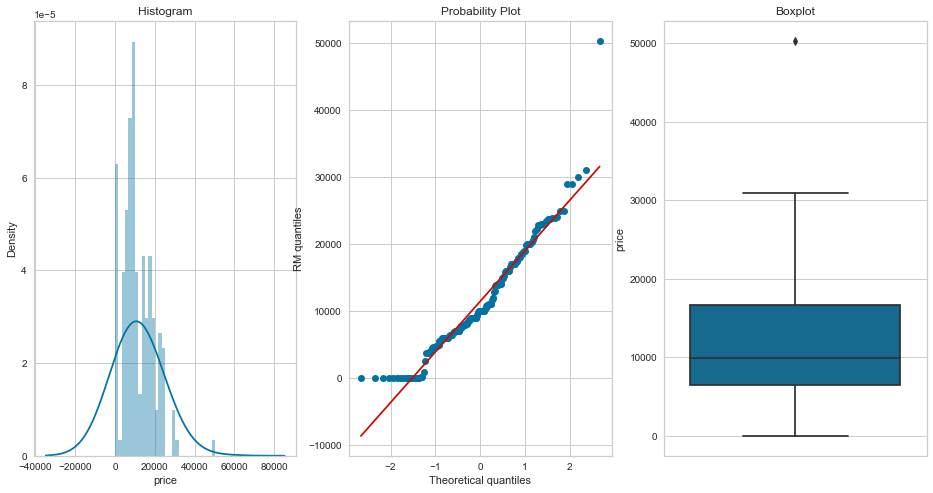

************************************************************ GMC ************************************************************
DescribeResult(nobs=156, minmax=(0, 85867), mean=19554.608974358973, variance=252804678.7428867, skewness=1.017292919310541, kurtosis=1.2692700293558072)


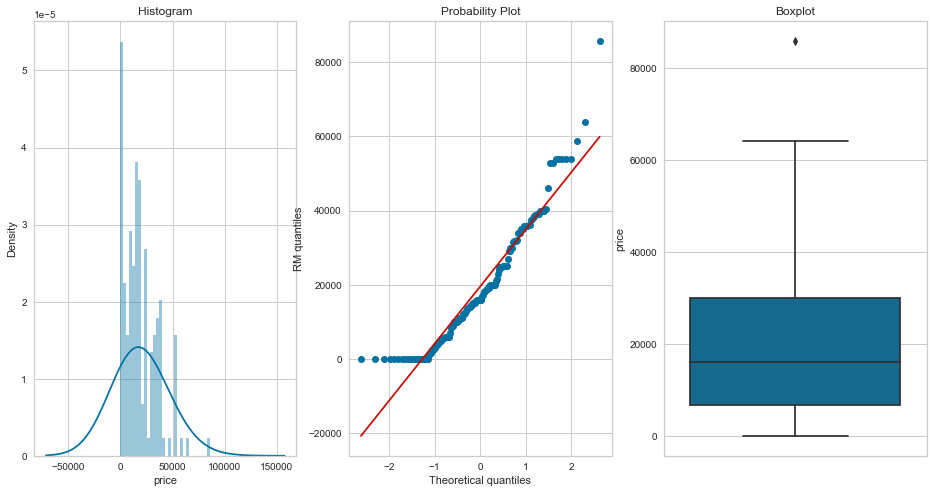

************************************************************ RAM ************************************************************
DescribeResult(nobs=140, minmax=(0, 73995), mean=26231.7, variance=293485985.82302153, skewness=0.05094263154230597, kurtosis=-0.8759041415391295)


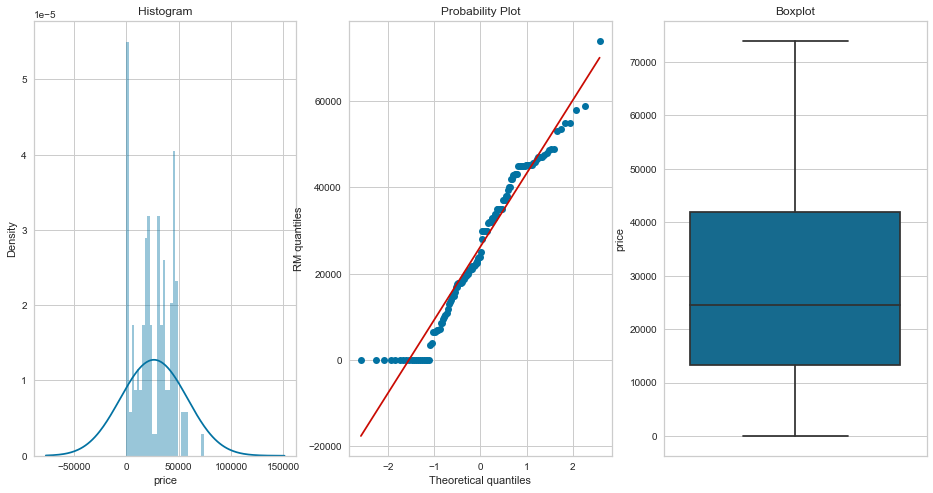

************************************************************ JEEP ************************************************************
DescribeResult(nobs=118, minmax=(0, 51500), mean=14040.661016949152, variance=111054540.67043315, skewness=0.8947708025123441, kurtosis=0.8124339466096324)


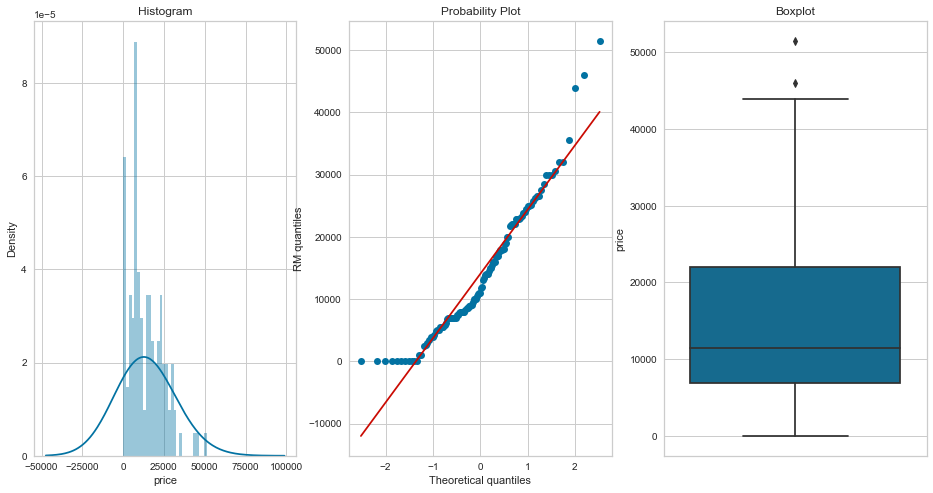

************************************************************ BMW ************************************************************
DescribeResult(nobs=95, minmax=(0, 39988), mean=12398.38947368421, variance=113950039.77222842, skewness=0.828297988225786, kurtosis=-0.07900103732606967)


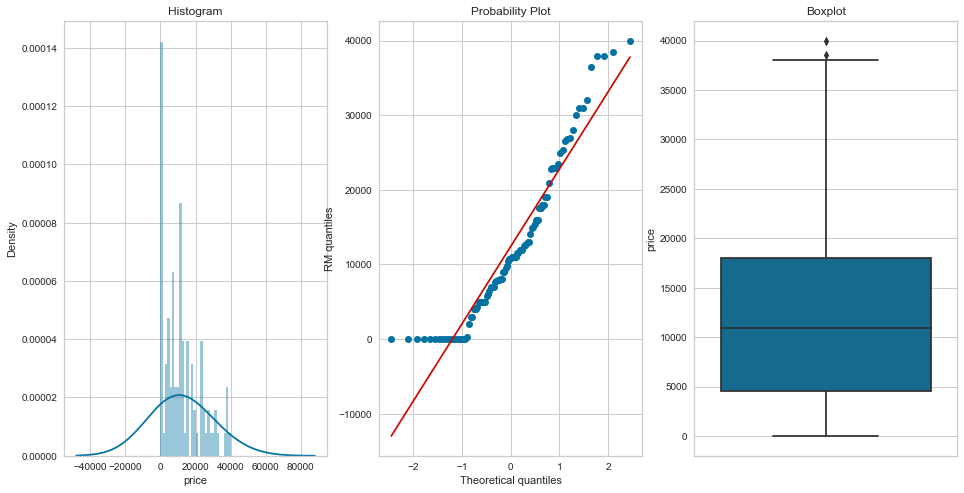

************************************************************ SUBARU ************************************************************
DescribeResult(nobs=94, minmax=(0, 32995), mean=10487.627659574468, variance=50633789.698581584, skewness=0.7368511837825419, kurtosis=0.335423594274066)


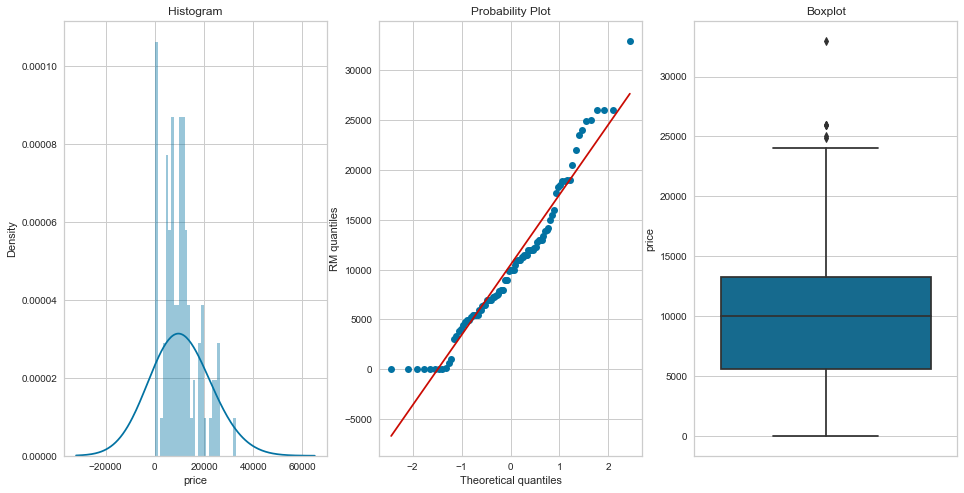

In [34]:
for i in to_plot_labels:
    print("******"*10,str(i).upper(),"******"*10,end="\n")
    print(stats.describe(df2[df2["manufacturer"]==i]["price"]))
    diagnostic_plots(df2[df2["manufacturer"]==i],"price")

In [35]:
df2.eq(0).sum().to_frame()

,0
id,0
region,0
price,242
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,14


In [36]:
df2[df2.price==0].shape[0]

242

In [37]:
df2=df2.drop(df2[df2["price"]==0].index)

In [38]:
stats.describe(df2.price)

DescribeResult(nobs=3277, minmax=(1, 144832), mean=16876.91516631065, variance=174802836.68388775, skewness=1.8095025663773672, kurtosis=6.453921429556511)

**Generate Numerical Correlation and Nominal Association Plots using Dython**

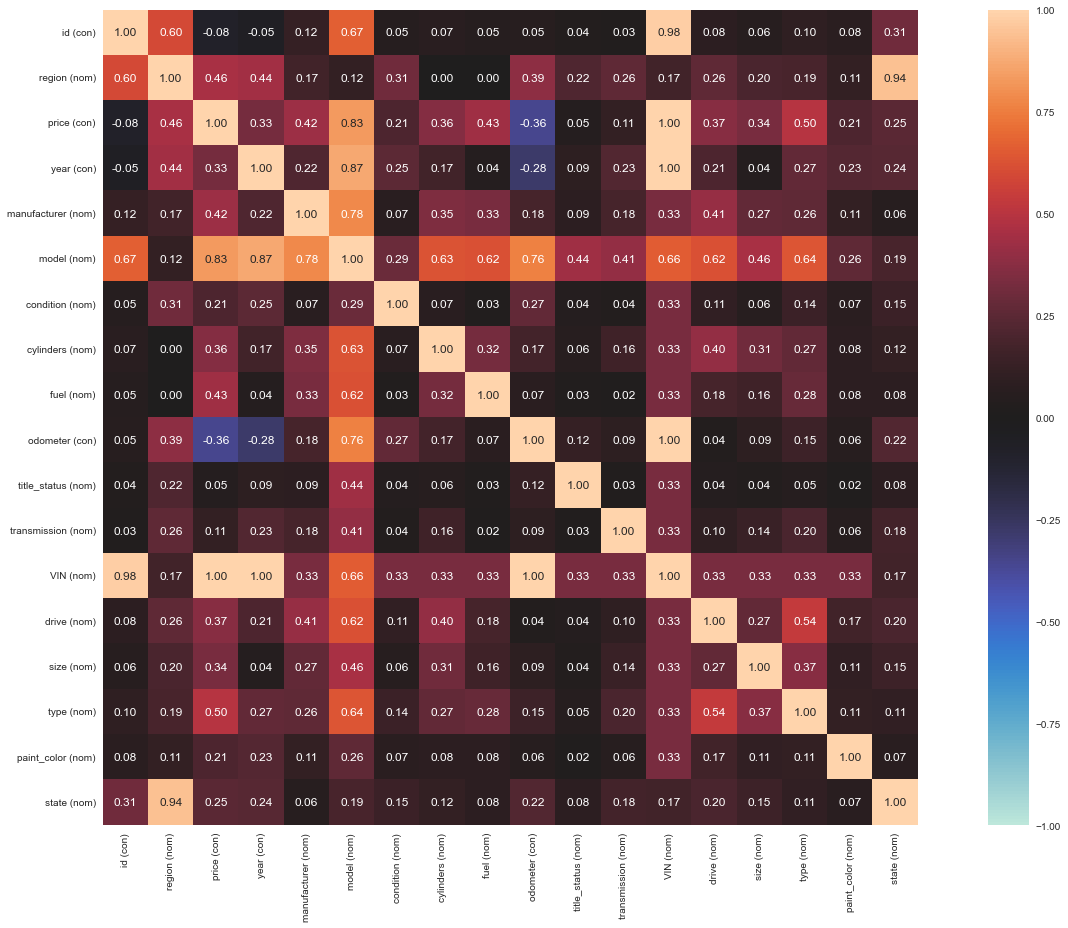

In [39]:
nominal.associations(df2,figsize=(25,15),mark_columns=True);

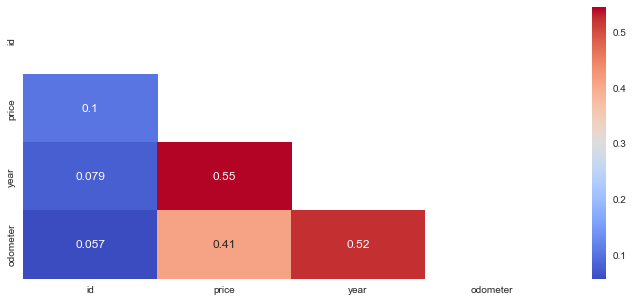

In [40]:
plt.figure(figsize=(12,5))
corr=df2.corr(method="spearman").abs()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,annot=True,cmap="coolwarm",mask=mask);

In [41]:
df2.drop(df2[(df2.price<500 )|( df2.price>28000)].index)["price"].describe()

count     2626.000000
mean     12448.051028
std       6662.748374
min        500.000000
25%       6995.000000
50%      10995.000000
75%      16995.000000
max      28000.000000
Name: price, dtype: float64

In [42]:
stats.describe(df2.drop(df2[(df2.price<500 )|( df2.price>28000)].index)["price"])

DescribeResult(nobs=2626, minmax=(500, 28000), mean=12448.051028179741, variance=44392215.89834752, skewness=0.5569702417509287, kurtosis=-0.6256984484794295)

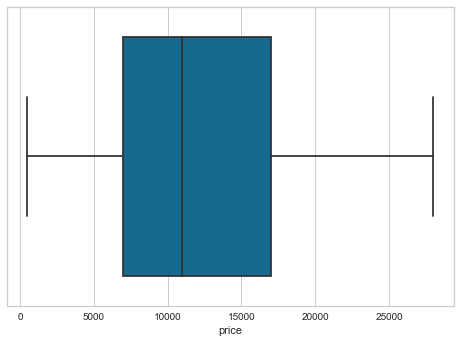

In [43]:
sns.boxplot(df2.drop(df2[(df2.price<500 )|( df2.price>28000)].index)["price"]);

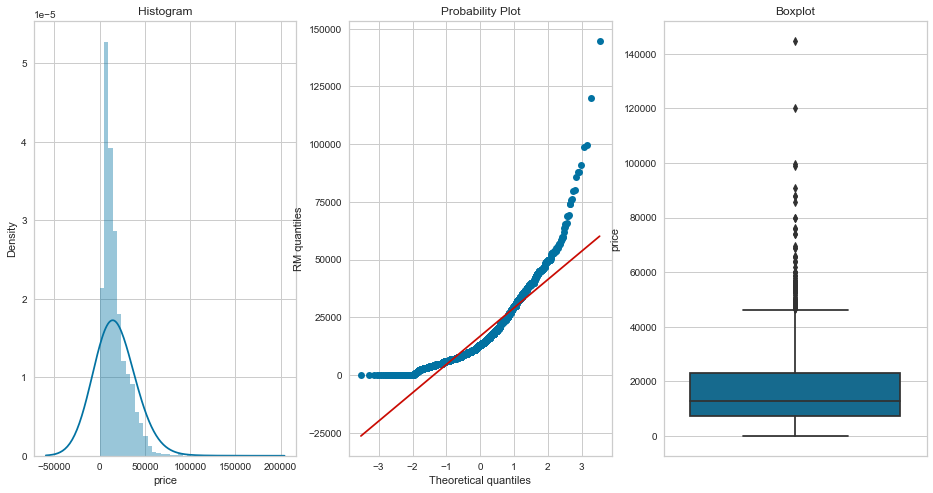

In [44]:
diagnostic_plots(df2,"price");

In [45]:
df_cleaned=df2.copy()

Normality Test before boxcox transformation: ShapiroResult(statistic=0.8609572649002075, pvalue=0.0)
Normality Test after boxcox transformation: ShapiroResult(statistic=0.9817093014717102, pvalue=3.686594063662819e-20)


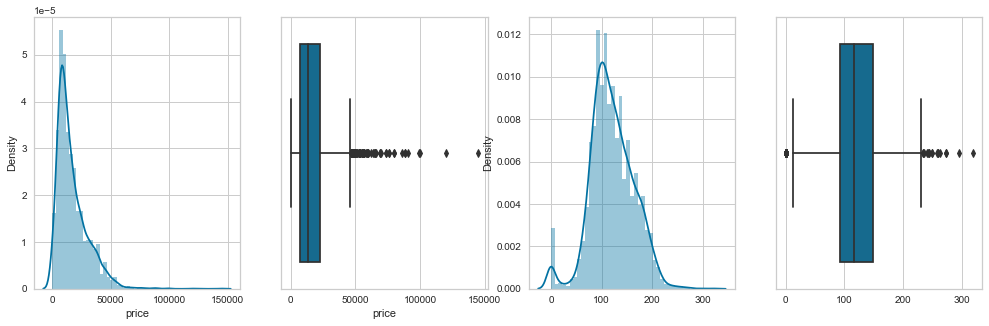

In [46]:
plt.figure(figsize=(17,5))

plt.subplot(141);
sns.distplot(df_cleaned.price);
print("Normality Test before boxcox transformation:",stats.shapiro(df_cleaned.price))

plt.subplot(142);
sns.boxplot(df_cleaned.price);

plt.subplot(143);
sns.distplot(stats.boxcox(df_cleaned.price)[0]);

plt.subplot(144);
sns.boxplot(stats.boxcox(df_cleaned.price)[0]);
print("Normality Test after boxcox transformation:",stats.shapiro(stats.boxcox(df_cleaned.price)[0]))

In [47]:
stats.boxcox(df_cleaned.price)[0][:5]

array([102.5804363 ,  99.63603353,  95.39266495, 161.3077326 ,
        62.94882827])

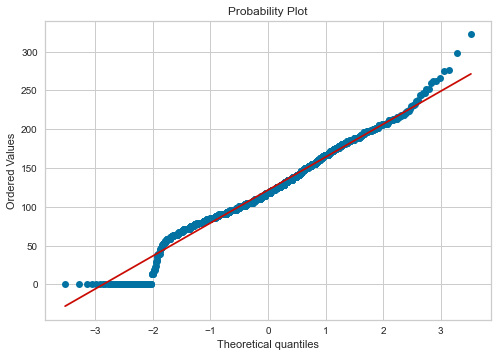

In [48]:
stats.probplot(stats.yeojohnson(df_cleaned.price)[0],dist="norm", plot=plt);

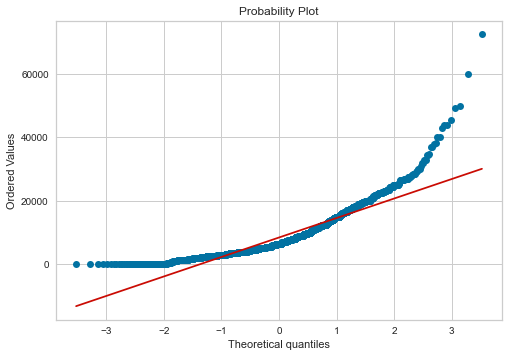

In [49]:
stats.probplot(df_cleaned.price**1/2,dist="norm", plot=plt);

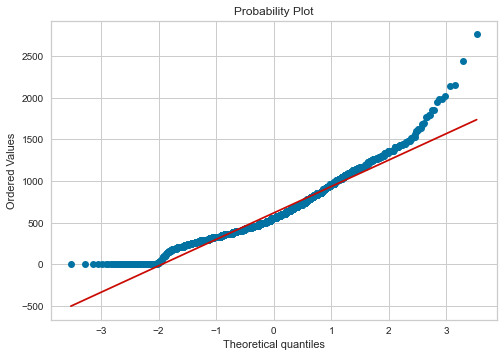

In [50]:
stats.probplot(df_cleaned.price**(1/1.5),dist="norm",plot=plt);

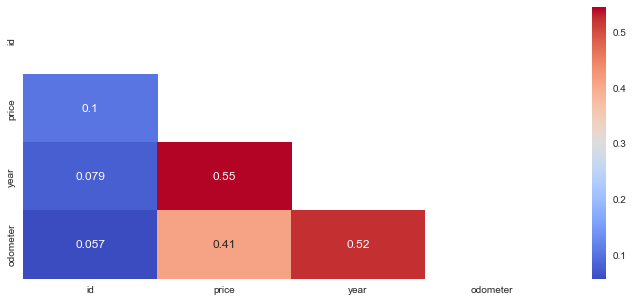

In [51]:
plt.figure(figsize=(12,5))
corr=df_cleaned.corr(method="spearman").abs()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,annot=True,cmap="coolwarm",mask=mask);

In [52]:
researchpy.correlation.corr_pair(df_cleaned.select_dtypes(exclude="object"))

,r value,p-value,N
id & price,-0.0788,0.0000,3277
id & year,-0.0489,0.0051,3277
id & odometer,0.0548,0.0017,3277
price & year,0.3267,0.0000,3277
price & odometer,-0.3590,0.0000,3277
year & odometer,-0.2766,0.0000,3277


In [53]:
df_cleaned.select_dtypes(include="object").columns[1:]

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')

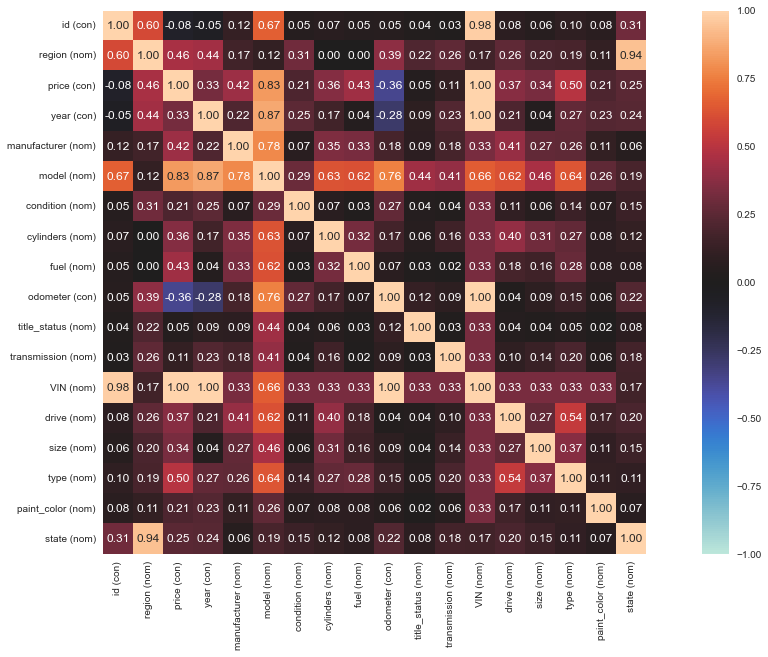

In [54]:
nominal.associations(df_cleaned,figsize=(20,10),mark_columns=True); # for nominal and categorical (Cramer's V)

In [55]:
for i in df_cleaned.select_dtypes(include="object").columns[1:]:
    print(str(i) + " and " + "model")
    
    crosstab, res = researchpy.crosstab(df_cleaned[i], df_cleaned["model"], test= "chi-square")
    print(res);

manufacturer and model
                    Chi-square test      results
0  Pearson Chi-square ( 49134.0) =   124466.4352
1                        p-value =        0.0000
2                     Cramer's V =        0.9998
model and model
                      Chi-square test    results
0  Pearson Chi-square ( 1671849.0) =   4237161.0
1                          p-value =         0.0
2                       Cramer's V =         1.0
condition and model
                   Chi-square test    results
0  Pearson Chi-square ( 6465.0) =   7881.2132
1                       p-value =      0.0000
2                    Cramer's V =      0.6935
cylinders and model
                   Chi-square test     results
0  Pearson Chi-square ( 9051.0) =   18090.1246
1                       p-value =       0.0000
2                    Cramer's V =       0.8880
fuel and model
                   Chi-square test     results
0  Pearson Chi-square ( 5172.0) =   10261.8544
1                       p-value =       0.0000
2

************************************************************ FORD ************************************************************
DescribeResult(nobs=716, minmax=(1, 99700), mean=22422.75837988827, variance=229307517.48699263, skewness=1.2272676597988477, kurtosis=2.527571568914823)


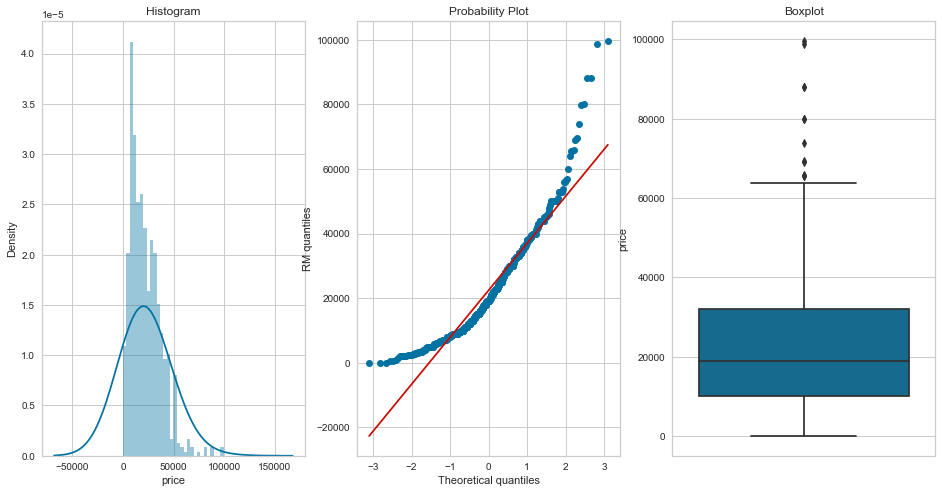

************************************************************ CHEVROLET ************************************************************
DescribeResult(nobs=529, minmax=(1, 61995), mean=18643.521739130436, variance=153316806.21212122, skewness=0.9756826845446123, kurtosis=0.4314313648899648)


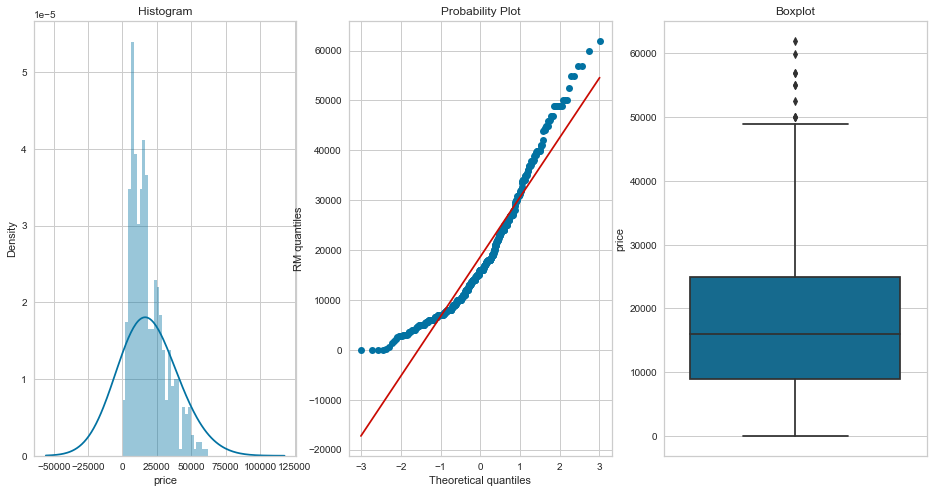

************************************************************ TOYOTA ************************************************************
DescribeResult(nobs=282, minmax=(1, 90978), mean=14194.975177304965, variance=128294539.8605916, skewness=2.128069946516922, kurtosis=7.619049086851739)


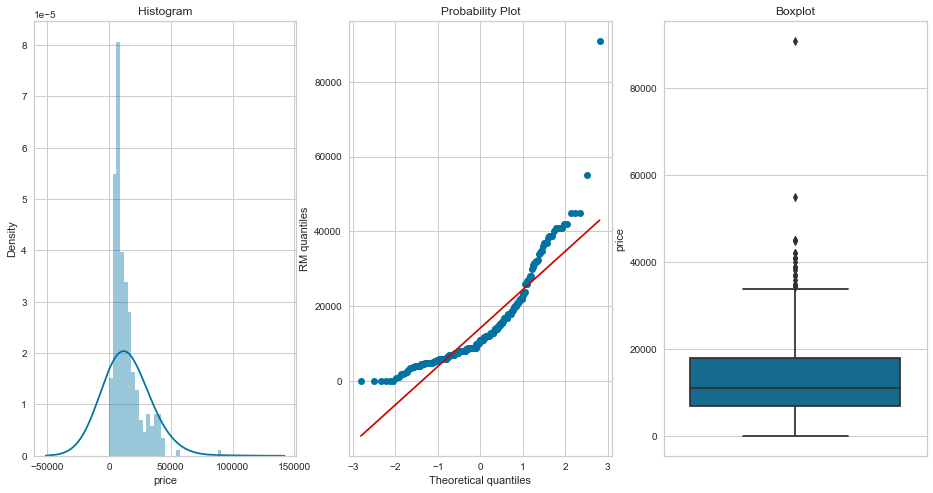

************************************************************ HONDA ************************************************************
DescribeResult(nobs=171, minmax=(85, 36990), mean=10702.25730994152, variance=44214791.46281391, skewness=1.5280497589403506, kurtosis=3.466677283009804)


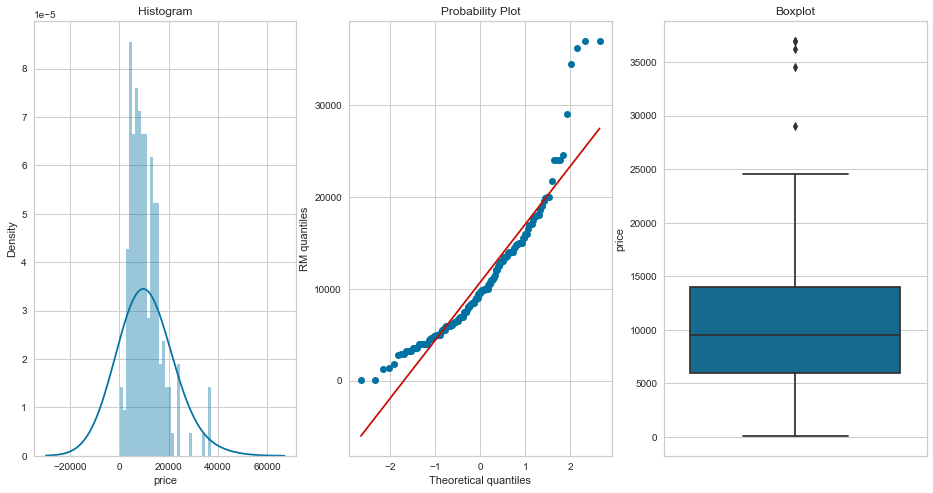

************************************************************ NISSAN ************************************************************
DescribeResult(nobs=169, minmax=(1, 50345), mean=12207.538461538461, variance=54557857.416666664, skewness=1.1689610251200593, kurtosis=3.1554254637097863)


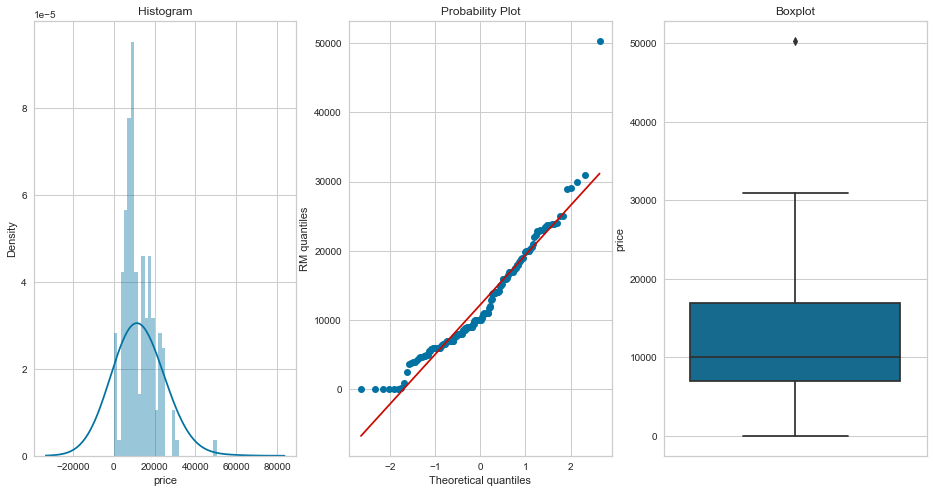

************************************************************ GMC ************************************************************
DescribeResult(nobs=136, minmax=(1000, 85867), mean=22430.28676470588, variance=225277151.61345318, skewness=1.1339705449015647, kurtosis=1.6532335087923933)


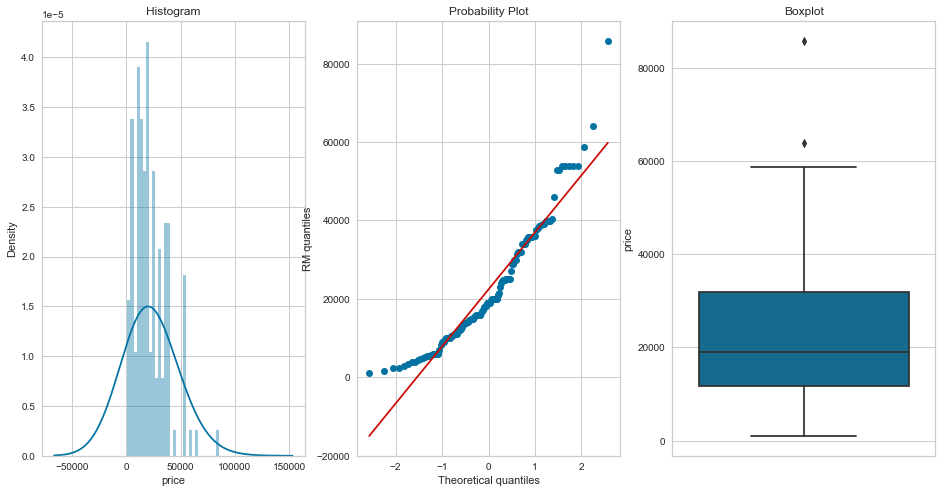

************************************************************ RAM ************************************************************
DescribeResult(nobs=129, minmax=(1, 73995), mean=28468.511627906977, variance=254531250.0643169, skewness=0.026954648147493532, kurtosis=-0.6988220247634769)


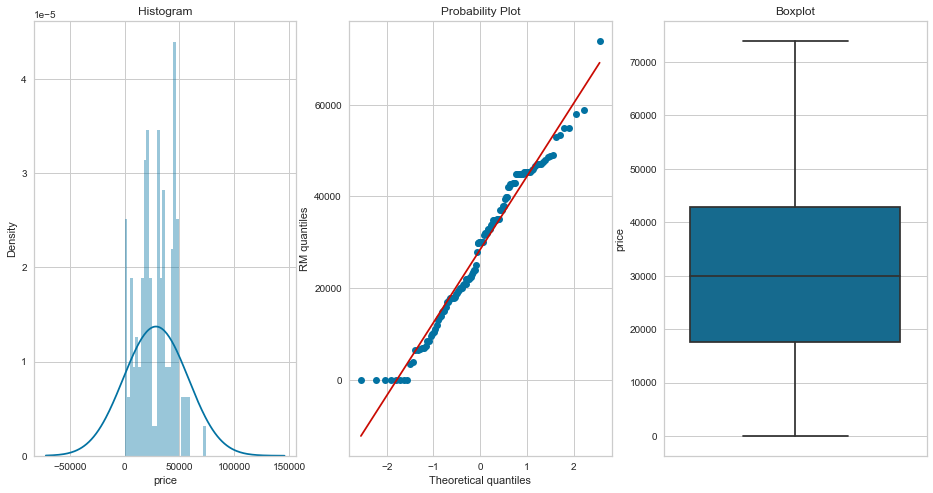

************************************************************ JEEP ************************************************************
DescribeResult(nobs=109, minmax=(1, 51500), mean=15199.981651376147, variance=102524269.90706761, skewness=0.9698085761507165, kurtosis=1.012688129702143)


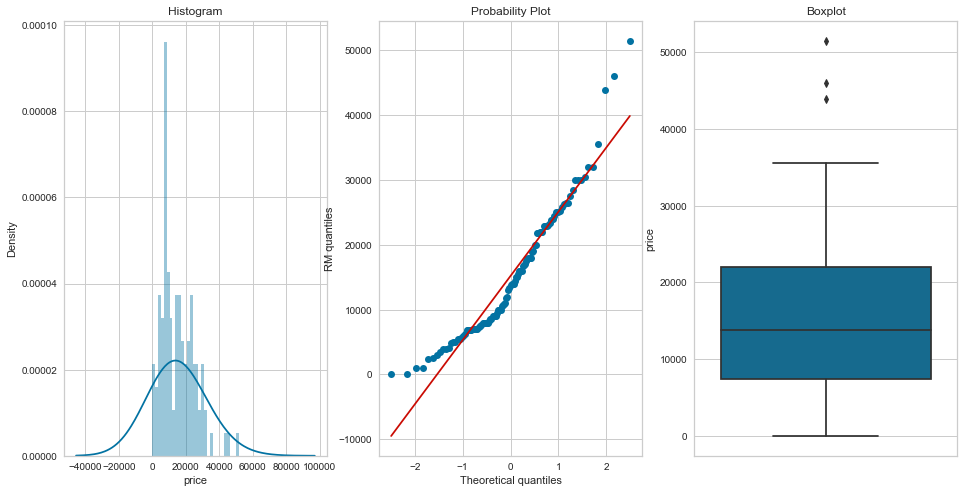

************************************************************ BMW ************************************************************
DescribeResult(nobs=86, minmax=(1, 39988), mean=13695.89534883721, variance=108035768.65950753, skewness=0.7948813660485343, kurtosis=-0.1133235186472632)


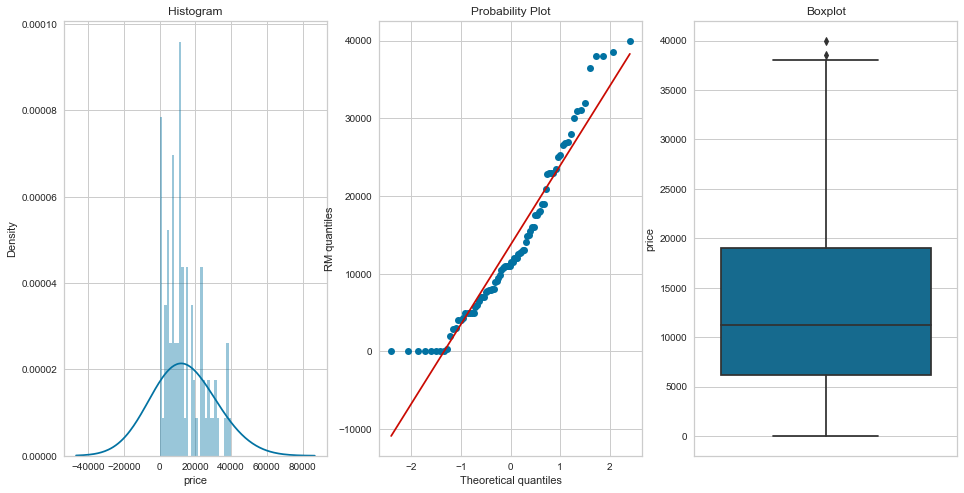

************************************************************ SUBARU ************************************************************
DescribeResult(nobs=86, minmax=(123, 32995), mean=11463.220930232557, variance=44084311.750615604, skewness=0.9193495781990965, kurtosis=0.5512322691147804)


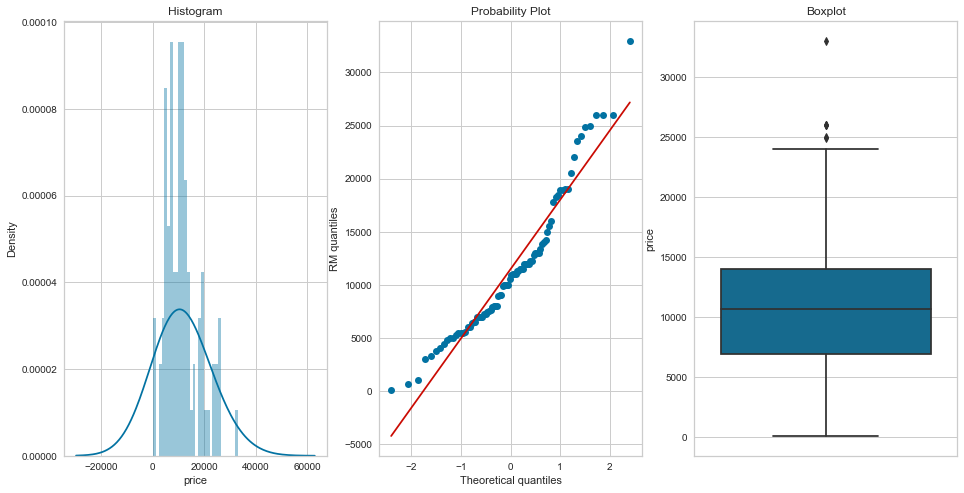

In [56]:
for i in to_plot_labels:
    print("******"*10,str(i).upper(),"******"*10,end="\n")
    print(stats.describe(df_cleaned[df_cleaned["manufacturer"]==i]["price"]))
    diagnostic_plots(df_cleaned[df_cleaned["manufacturer"]==i],"price")

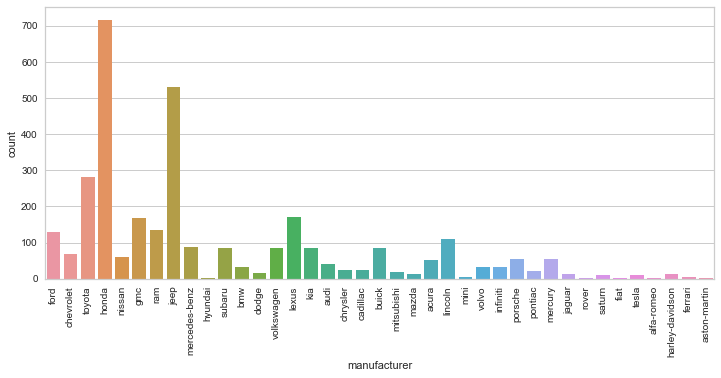

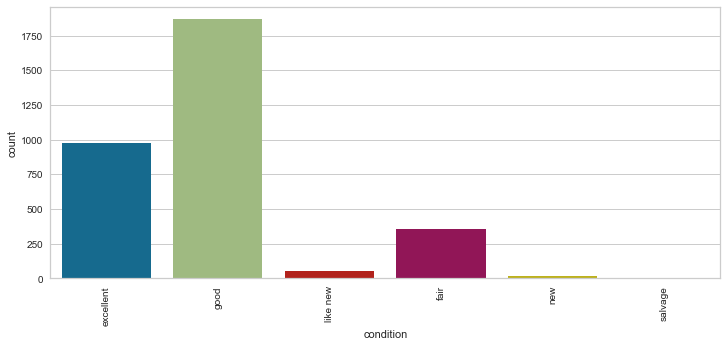

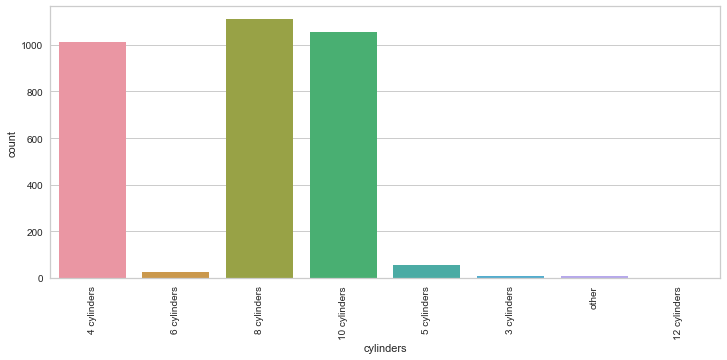

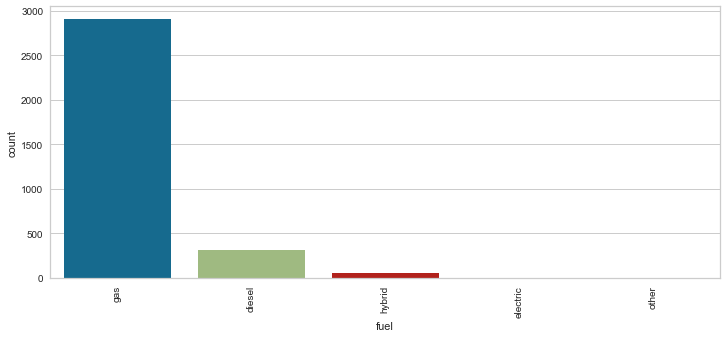

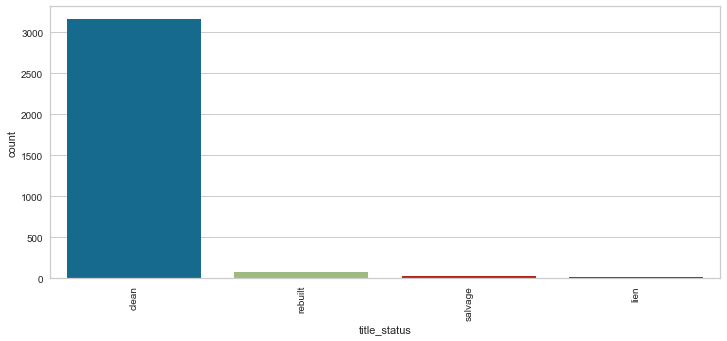

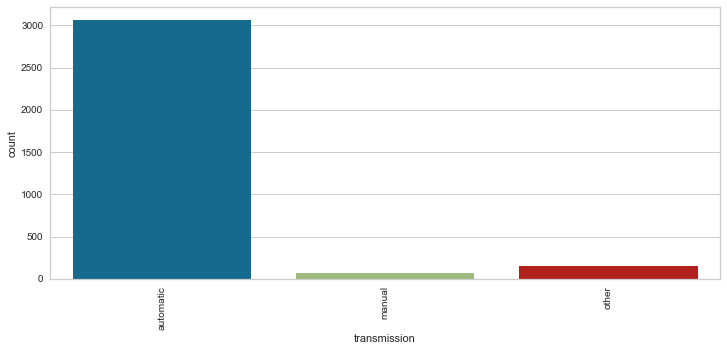

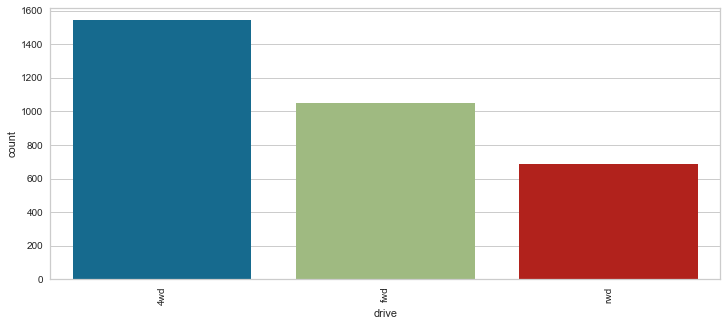

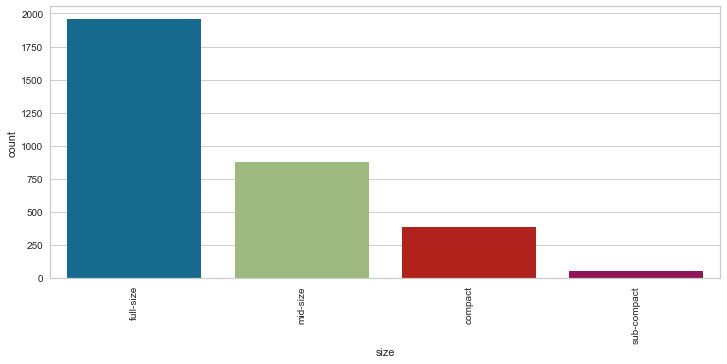

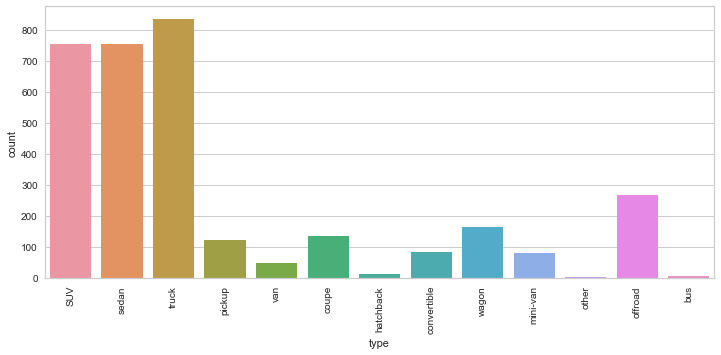

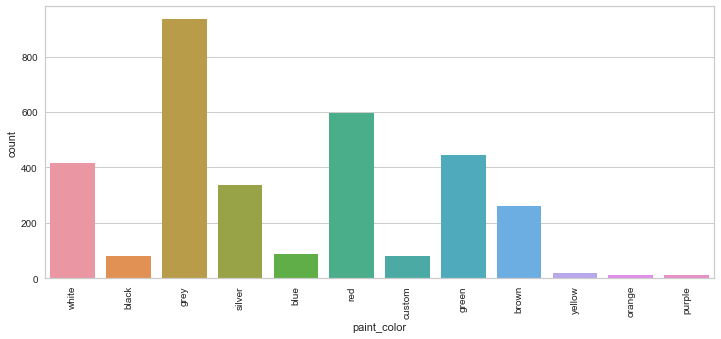

In [57]:
cols=["manufacturer","condition","cylinders","fuel","title_status","transmission","drive","size","type","paint_color"]

for i in cols:
    plt.figure(figsize=(12,5));
    sns.countplot(df_cleaned[i]).set_xticklabels(labels=df_cleaned[i].value_counts().index,rotation=90);
    
    plt.show();

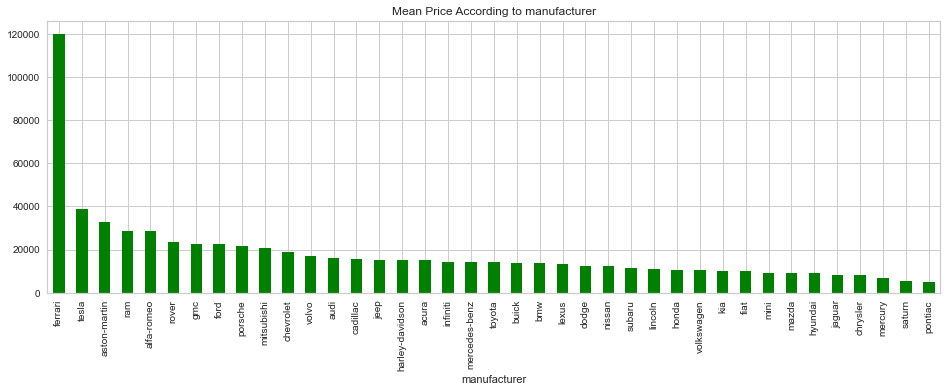

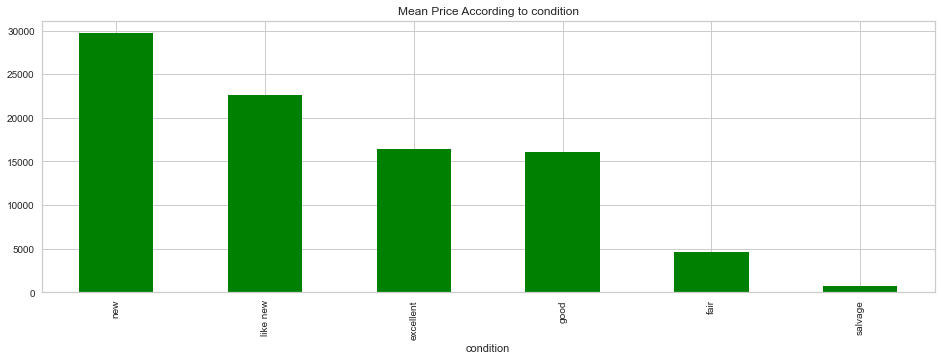

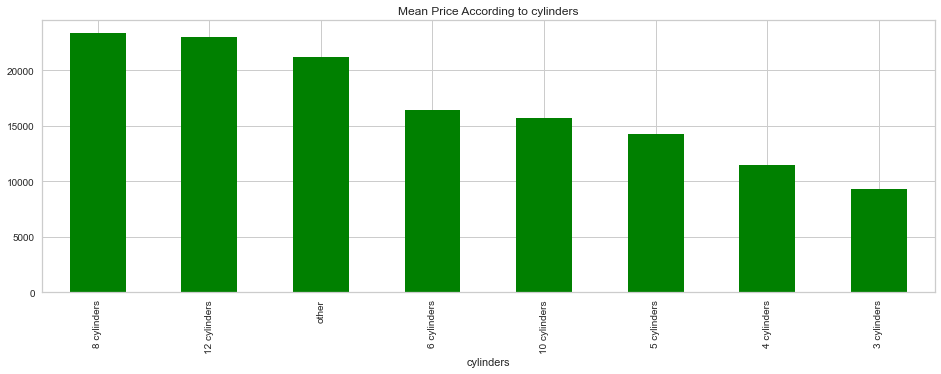

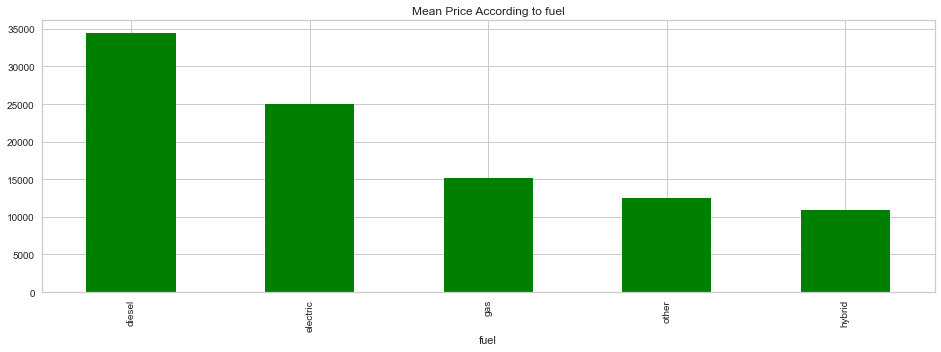

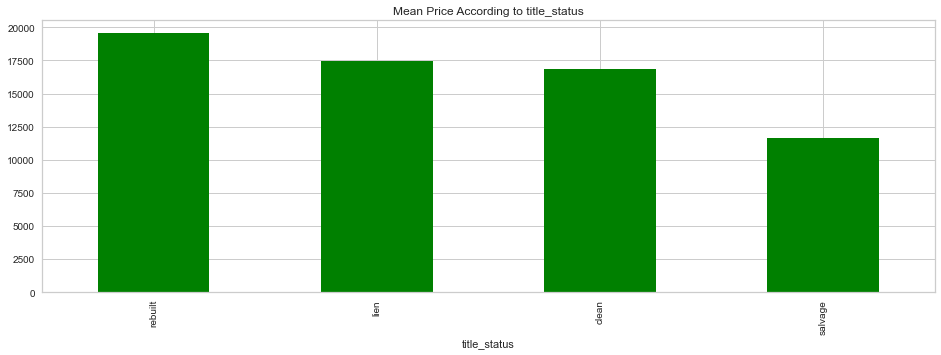

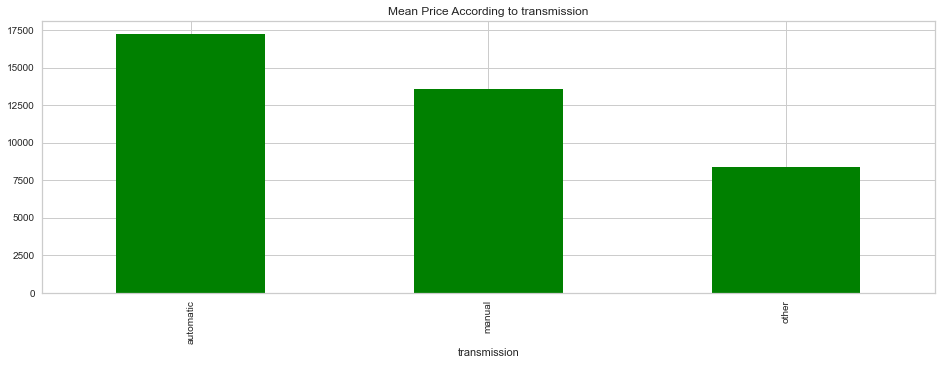

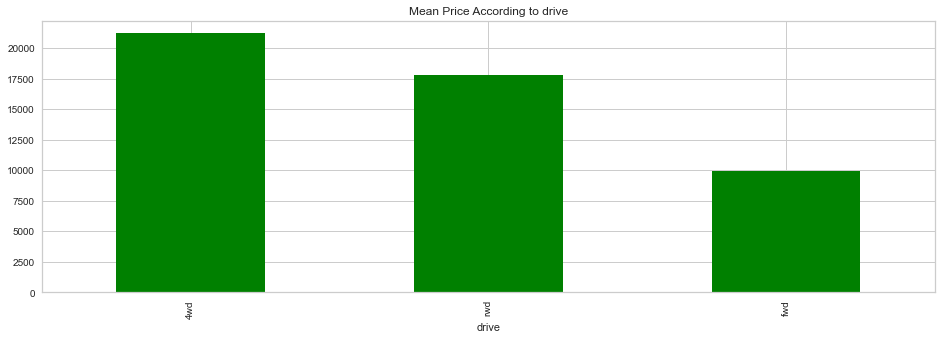

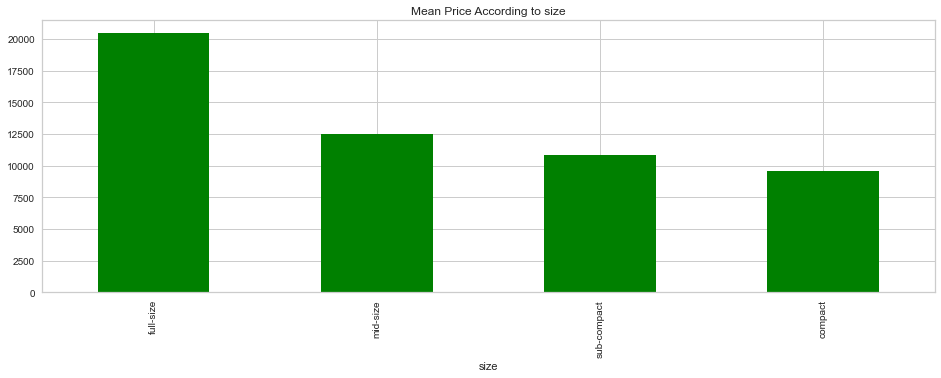

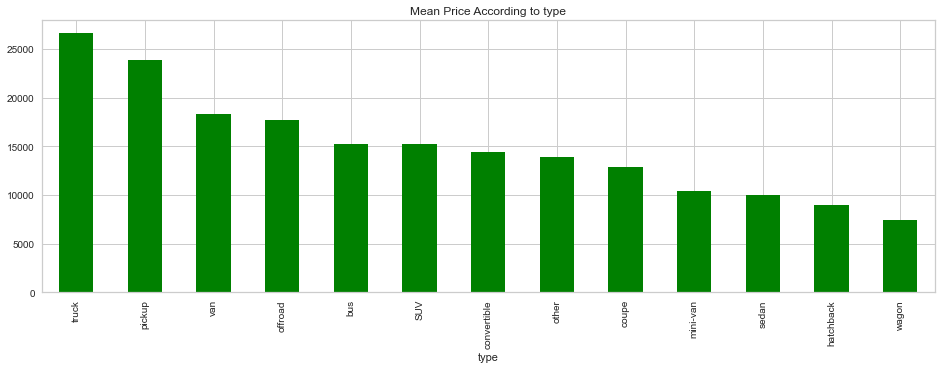

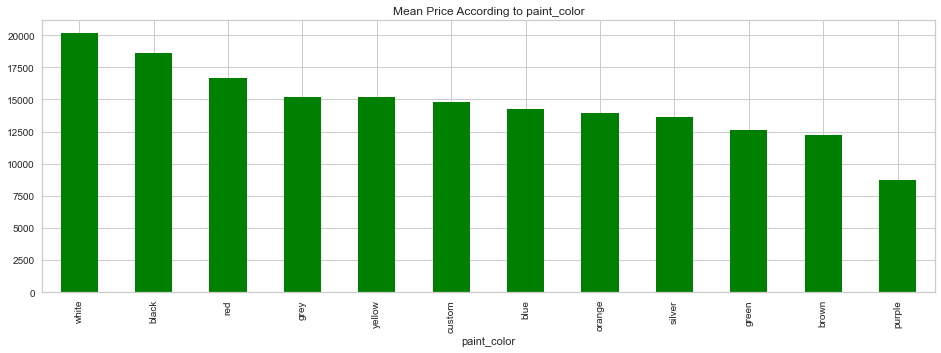

In [58]:
for i in cols:
    df_cleaned.groupby(i)["price"].mean().sort_values(ascending=False).plot.bar(figsize=(16,5),color='green');
    plt.title("Mean Price According to " + str(i))
    plt.show();

In [59]:
df_cleaned.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
101063,7313859321,lakeland,9500,2005,ram,2500,good,8 cylinders,gas,113275,clean,automatic,3D7KS28D15G813247,4wd,full-size,truck,silver,fl
233416,7311594580,charlotte,8865,2013,volkswagen,jetta se 2.5,excellent,5 cylinders,gas,62166,rebuilt,automatic,3VWDP7AJ5DM431480,fwd,mid-size,sedan,brown,nc
280920,7311701252,syracuse,7995,2007,toyota,rav4,excellent,4 cylinders,gas,134784,clean,automatic,JTMBD31VX75073611,4wd,full-size,SUV,silver,ny
386054,7311476708,salt lake city,27990,2011,ford,f-750,good,6 cylinders,diesel,123622,clean,automatic,3FRXF7FL5BV557295,rwd,full-size,truck,white,ut
147724,7314851141,"st louis, MO",3000,2004,lexus,es 330,excellent,6 cylinders,gas,191481,clean,automatic,JTHBA30G040004025,fwd,mid-size,sedan,silver,il


In [60]:
df_cleaned=df_cleaned.drop(columns=["model"],axis=1)
df_cleaned.head()

,id,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
101063,7313859321,lakeland,9500,2005,ram,good,8 cylinders,gas,113275,clean,automatic,3D7KS28D15G813247,4wd,full-size,truck,silver,fl
233416,7311594580,charlotte,8865,2013,volkswagen,excellent,5 cylinders,gas,62166,rebuilt,automatic,3VWDP7AJ5DM431480,fwd,mid-size,sedan,brown,nc
280920,7311701252,syracuse,7995,2007,toyota,excellent,4 cylinders,gas,134784,clean,automatic,JTMBD31VX75073611,4wd,full-size,SUV,silver,ny
386054,7311476708,salt lake city,27990,2011,ford,good,6 cylinders,diesel,123622,clean,automatic,3FRXF7FL5BV557295,rwd,full-size,truck,white,ut
147724,7314851141,"st louis, MO",3000,2004,lexus,excellent,6 cylinders,gas,191481,clean,automatic,JTHBA30G040004025,fwd,mid-size,sedan,silver,il


In [61]:
df_cleaned.state.value_counts().count()

51

In [62]:
df_cleaned.region.value_counts().count()

318

In [63]:
df_cleaned=df_cleaned.drop(columns=["region"],axis=1)

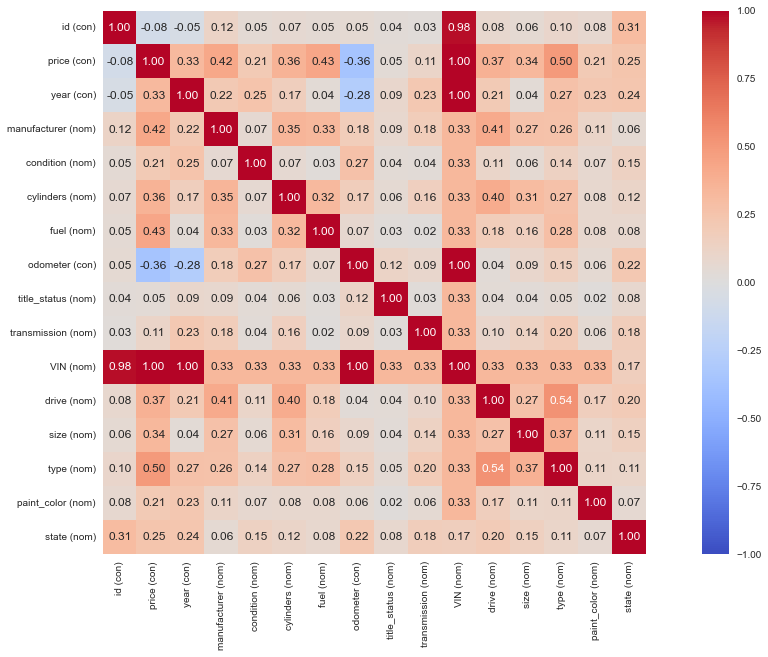

In [64]:
nominal.associations(df_cleaned,figsize=(20,10),mark_columns=True,cmap="coolwarm");

In [65]:
df_cleaned.head()

,id,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
101063,7313859321,9500,2005,ram,good,8 cylinders,gas,113275,clean,automatic,3D7KS28D15G813247,4wd,full-size,truck,silver,fl
233416,7311594580,8865,2013,volkswagen,excellent,5 cylinders,gas,62166,rebuilt,automatic,3VWDP7AJ5DM431480,fwd,mid-size,sedan,brown,nc
280920,7311701252,7995,2007,toyota,excellent,4 cylinders,gas,134784,clean,automatic,JTMBD31VX75073611,4wd,full-size,SUV,silver,ny
386054,7311476708,27990,2011,ford,good,6 cylinders,diesel,123622,clean,automatic,3FRXF7FL5BV557295,rwd,full-size,truck,white,ut
147724,7314851141,3000,2004,lexus,excellent,6 cylinders,gas,191481,clean,automatic,JTHBA30G040004025,fwd,mid-size,sedan,silver,il


In [66]:
def find_dataset_skew(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    #print("Test for printing IQR values:",stats.iqr(df[variable]))
    
    print("The IQR value is:",IQR)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [67]:
find_dataset_skew(df_cleaned,"price",1.5)

The IQR value is: 15495.0


(46237.5, -15742.5)

In [68]:
upper_odo,lower_odo=find_dataset_skew(df_cleaned,"odometer",1.5)
upper_odo,lower_odo

The IQR value is: 76047.0


(257170.5, -47017.5)

In [69]:
df_cleaned[(df_cleaned.odometer>upper_odo)].shape,df_cleaned[~(df_cleaned.odometer>upper_odo)].shape

((36, 16), (3241, 16))

In [70]:
df_cleaned[df_cleaned.odometer<0]

,id,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


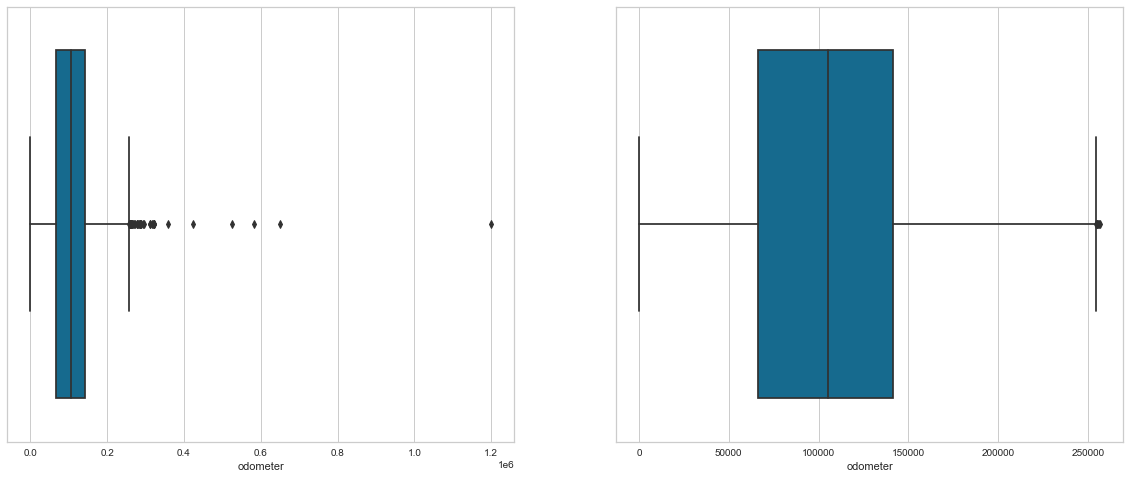

In [71]:
plt.figure(figsize=(20,8));
plt.subplot(121);
sns.boxplot(df_cleaned.odometer);

plt.subplot(122);
sns.boxplot(df_cleaned[~(df_cleaned.odometer>upper_odo)]["odometer"]);

In [72]:
df_cleaned=df_cleaned[~(df_cleaned.odometer>upper_odo)]
df_cleaned.head()

,id,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
101063,7313859321,9500,2005,ram,good,8 cylinders,gas,113275,clean,automatic,3D7KS28D15G813247,4wd,full-size,truck,silver,fl
233416,7311594580,8865,2013,volkswagen,excellent,5 cylinders,gas,62166,rebuilt,automatic,3VWDP7AJ5DM431480,fwd,mid-size,sedan,brown,nc
280920,7311701252,7995,2007,toyota,excellent,4 cylinders,gas,134784,clean,automatic,JTMBD31VX75073611,4wd,full-size,SUV,silver,ny
386054,7311476708,27990,2011,ford,good,6 cylinders,diesel,123622,clean,automatic,3FRXF7FL5BV557295,rwd,full-size,truck,white,ut
147724,7314851141,3000,2004,lexus,excellent,6 cylinders,gas,191481,clean,automatic,JTHBA30G040004025,fwd,mid-size,sedan,silver,il


** We can remove Advertisement id and Vehicle Identification number as the assumption for the model is that  these two features do not have any effect on vehicle pricing **

In [73]:
df_cleaned=df_cleaned.drop(columns=["id","VIN"],axis=1)
df_cleaned.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
101063,9500,2005,ram,good,8 cylinders,gas,113275,clean,automatic,4wd,full-size,truck,silver,fl
233416,8865,2013,volkswagen,excellent,5 cylinders,gas,62166,rebuilt,automatic,fwd,mid-size,sedan,brown,nc
280920,7995,2007,toyota,excellent,4 cylinders,gas,134784,clean,automatic,4wd,full-size,SUV,silver,ny
386054,27990,2011,ford,good,6 cylinders,diesel,123622,clean,automatic,rwd,full-size,truck,white,ut
147724,3000,2004,lexus,excellent,6 cylinders,gas,191481,clean,automatic,fwd,mid-size,sedan,silver,il


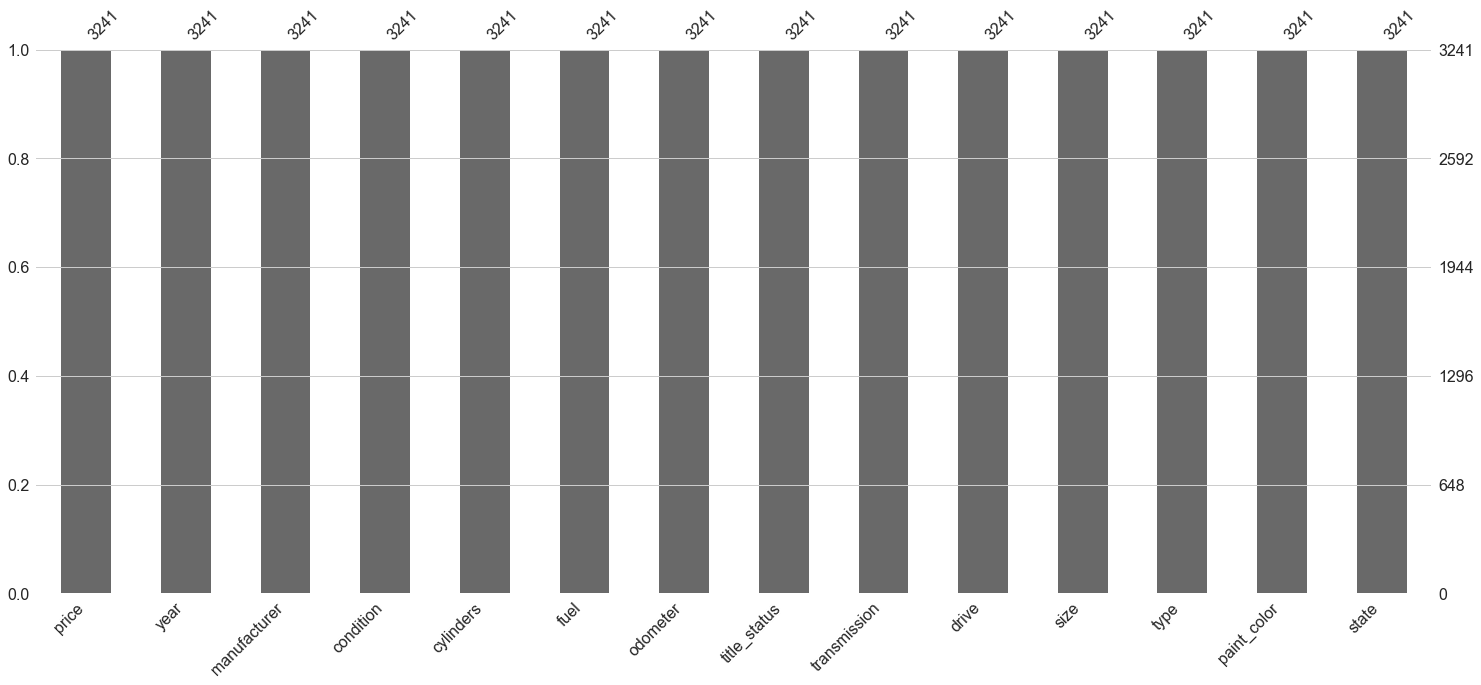

In [74]:
#  Perform a final check for any missing data

msno.bar(df_cleaned);

In [75]:
#Export the cleaned file without the index to data repository, in case we need it later
df_cleaned.to_csv('./data/cleaned_vehicles.csv',index=False)

### Feature Preprocessing and Transformations for ML models

In [76]:
vehicles=pd.read_csv("./data/cleaned_vehicles.csv")
vehicles.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,9500,2005,ram,good,8 cylinders,gas,113275,clean,automatic,4wd,full-size,truck,silver,fl
1,8865,2013,volkswagen,excellent,5 cylinders,gas,62166,rebuilt,automatic,fwd,mid-size,sedan,brown,nc
2,7995,2007,toyota,excellent,4 cylinders,gas,134784,clean,automatic,4wd,full-size,SUV,silver,ny
3,27990,2011,ford,good,6 cylinders,diesel,123622,clean,automatic,rwd,full-size,truck,white,ut
4,3000,2004,lexus,excellent,6 cylinders,gas,191481,clean,automatic,fwd,mid-size,sedan,silver,il


**Setting up the Train-Test Split for vehicle data**

In [77]:
X=vehicles.drop(columns=["price"])
y=vehicles["price"]

In [78]:
#verify the features

X.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2005,ram,good,8 cylinders,gas,113275,clean,automatic,4wd,full-size,truck,silver,fl
1,2013,volkswagen,excellent,5 cylinders,gas,62166,rebuilt,automatic,fwd,mid-size,sedan,brown,nc
2,2007,toyota,excellent,4 cylinders,gas,134784,clean,automatic,4wd,full-size,SUV,silver,ny
3,2011,ford,good,6 cylinders,diesel,123622,clean,automatic,rwd,full-size,truck,white,ut
4,2004,lexus,excellent,6 cylinders,gas,191481,clean,automatic,fwd,mid-size,sedan,silver,il


In [79]:
#verify dependent set
y.head()

0     9500
1     8865
2     7995
3    27990
4     3000
Name: price, dtype: int64

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [81]:
columns_with_multiple_categories=[]

for columns in X_train.columns:
    
          #feature   is categorical
        
    if X_train[columns].dtypes =='O': 
        
                # has more than 10 categories
        if X_train[columns].nunique() > 10:  
            
             #add to the list to track columns with multiple sub-categories
                
            columns_with_multiple_categories.append(columns)   
            
            # display  percentage of observations within each sub-category
            
            print(X_train.groupby(columns)[columns].count()/ len(X_train)) 
            
            print()

manufacturer
acura              0.006944
alfa-romeo         0.000772
audi               0.016204
bmw                0.027006
buick              0.008488
cadillac           0.012731
chevrolet          0.159722
chrysler           0.015046
dodge              0.026235
ferrari            0.000386
fiat               0.001543
ford               0.225694
gmc                0.043981
harley-davidson    0.000386
honda              0.050540
hyundai            0.025077
infiniti           0.005787
jaguar             0.003472
jeep               0.034336
kia                0.015818
lexus              0.016204
lincoln            0.005787
mazda              0.009259
mercedes-benz      0.025463
mercury            0.003858
mini               0.006944
mitsubishi         0.010031
nissan             0.048611
pontiac            0.004244
porsche            0.004630
ram                0.039738
rover              0.002701
saturn             0.001157
subaru             0.026620
tesla              0.000772
toyota 

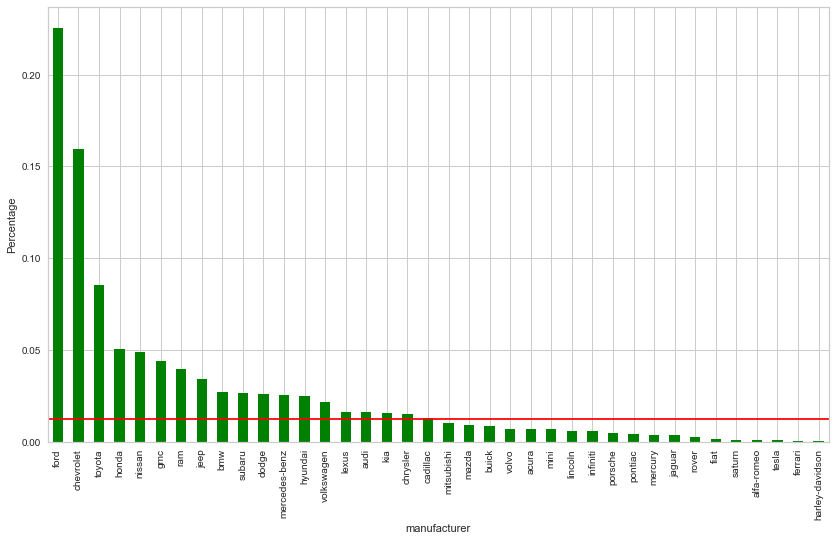

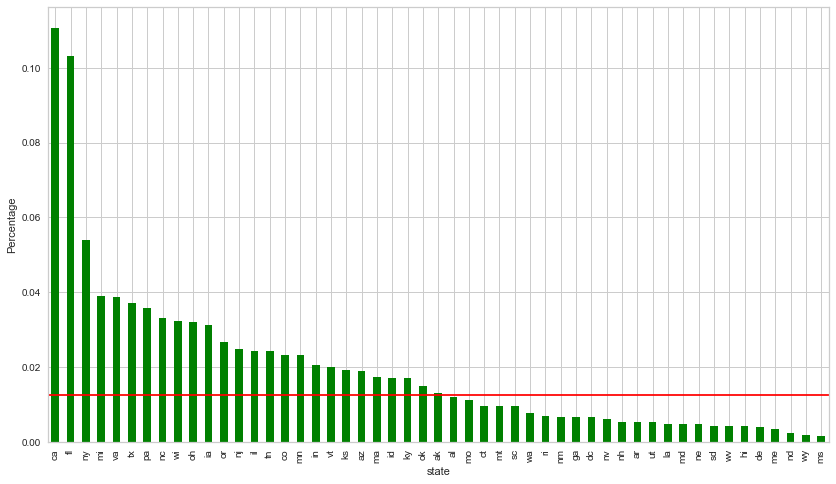

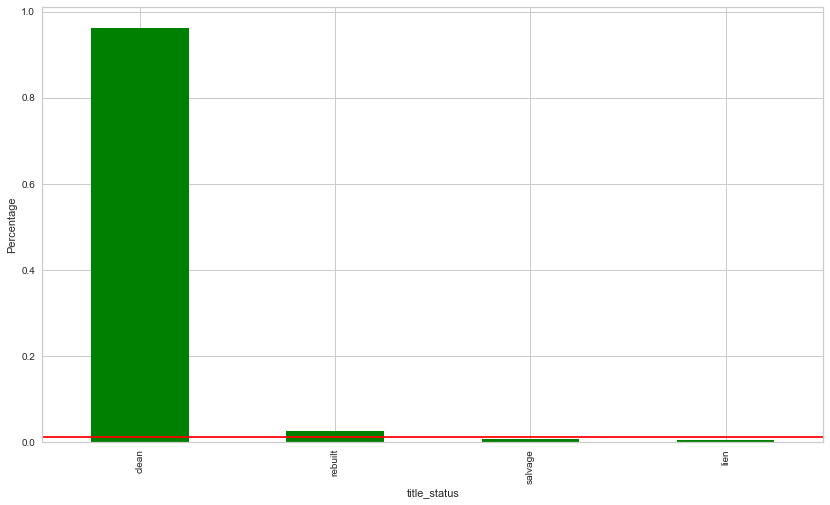

In [82]:
for columns in ['manufacturer', 'state', 'title_status']:

    temp_df = pd.Series(X_train[columns].value_counts() / len(X_train) )
    plt.figure(figsize=(14,8));
    
    # plot calculated percentages
    
    fig = temp_df.sort_values(ascending=False).plot.bar(color='green')
    fig.set_xlabel(columns)

    # draw a line at 5 % mark to highlight threshold for rare categories
    fig.axhline(y=0.0125, color='red')
    fig.set_ylabel('Percentage')
    plt.show()

In [83]:
X_train.manufacturer.value_counts().to_frame()

,manufacturer
ford,585
chevrolet,414
toyota,221
honda,131
nissan,126
gmc,114
ram,103
jeep,89
bmw,70
subaru,69


In [84]:
X_train.manufacturer.value_counts().index[-10:]

Index(['pontiac', 'mercury', 'jaguar', 'rover', 'fiat', 'saturn', 'tesla',
       'alfa-romeo', 'ferrari', 'harley-davidson'],
      dtype='object')

In [85]:
# change the model year to age of the vehicle from the current year
# using 2022

X_train["year"]=2022-X_train["year"]
X_test["year"]=2022-X_test["year"]
X_train.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
2936,18,jaguar,like new,8 cylinders,gas,141815,clean,automatic,rwd,full-size,sedan,black,sc
840,12,volkswagen,excellent,4 cylinders,gas,97000,clean,automatic,fwd,compact,coupe,red,ia
1174,8,nissan,excellent,4 cylinders,gas,34761,clean,automatic,fwd,full-size,sedan,brown,al
1618,14,toyota,good,6 cylinders,gas,177138,clean,automatic,4wd,full-size,SUV,grey,mn
2656,18,ram,good,6 cylinders,gas,98000,clean,manual,rwd,full-size,truck,white,oh


In [86]:
rare_encoder = rare_label.RareLabelEncoder(
    # minimum threshold value to be considered as a non-rare 
    
    tol=0.0125,  
    
    #minimum category count to regroup rare categories
    
    n_categories=10,  
    
    # features to re-group
    
    variables=["manufacturer","state","title_status"] 
)  

In [87]:
rare_encoder.fit(X_train)

RareLabelEncoder(tol=0.0125,
                 variables=['manufacturer', 'state', 'title_status'])

In [88]:
rare_encoder.encoder_dict_

{'manufacturer': Index(['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'gmc', 'ram', 'jeep',
        'bmw', 'subaru', 'dodge', 'mercedes-benz', 'hyundai', 'volkswagen',
        'lexus', 'audi', 'kia', 'chrysler', 'cadillac'],
       dtype='object'),
 'state': Index(['ca', 'fl', 'ny', 'mi', 'va', 'tx', 'pa', 'nc', 'wi', 'oh', 'ia', 'or',
        'nj', 'il', 'tn', 'co', 'mn', 'in', 'vt', 'ks', 'az', 'ma', 'id', 'ky',
        'ok', 'ak'],
       dtype='object'),
 'title_status': array(['clean', 'rebuilt', 'salvage', 'lien'], dtype=object)}

In [89]:
X_train = rare_encoder.transform(X_train)
X_test = rare_encoder.transform(X_test)

In [90]:
rare_encoder = rare_label.RareLabelEncoder(
    
    # minimum threshold value to be considered as a non-rare
    
    tol=0.05,   
    
    #minimum category count to regroup rare categories
    
    n_categories=3,  
    
    # features to re-group
    
    variables=["title_status"],
    
    replace_with='NotClean' 
) 

In [91]:
rare_encoder.fit(X_train)
X_train = rare_encoder.transform(X_train)
X_test = rare_encoder.transform(X_test)

In [92]:
X_train.title_status.value_counts()

clean       2496
NotClean      96
Name: title_status, dtype: int64

In [93]:
X_train.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
2936,18,Rare,like new,8 cylinders,gas,141815,clean,automatic,rwd,full-size,sedan,black,Rare
840,12,volkswagen,excellent,4 cylinders,gas,97000,clean,automatic,fwd,compact,coupe,red,ia
1174,8,nissan,excellent,4 cylinders,gas,34761,clean,automatic,fwd,full-size,sedan,brown,Rare
1618,14,toyota,good,6 cylinders,gas,177138,clean,automatic,4wd,full-size,SUV,grey,mn
2656,18,ram,good,6 cylinders,gas,98000,clean,manual,rwd,full-size,truck,white,oh


In [94]:
X_train.condition.value_counts()

excellent    1482
good          769
like new      284
fair           39
new            15
salvage         3
Name: condition, dtype: int64

In [95]:
#encode the different vehicle conditions in an ordinal fashion, can also use ordinal encoder 

X_train.condition=X_train.condition.replace({"salvage":1,"new":2,"fair":3,"like new":4,"good":5,"excellent":6})

X_test.condition=X_test.condition.replace({"salvage":1,"new":2,"fair":3,"like new":4,"good":5,"excellent":6})

In [96]:
#Convert categorical data into dummy or indicator variables

X_train_encoded=pd.get_dummies(X_train,drop_first=True)
X_test_encoded=pd.get_dummies(X_test,drop_first=True)
X_train_encoded.head()

,year,condition,odometer,manufacturer_audi,manufacturer_bmw,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,manufacturer_kia,manufacturer_lexus,manufacturer_mercedes-benz,manufacturer_nissan,manufacturer_ram,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,transmission_manual,transmission_other,drive_fwd,drive_rwd,size_full-size,size_mid-size,size_sub-compact,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_ak,state_az,state_ca,state_co,state_fl,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_ma,state_mi,state_mn,state_nc,state_nj,state_ny,state_oh,state_ok,state_or,state_pa,state_tn,state_tx,state_va,state_vt,state_wi
2936,18,4,141815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
840,12,6,97000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1174,8,6,34761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1618,14,5,177138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2656,18,5,98000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [97]:
models=[]
models.append(LinearRegression())
models.append(Ridge(alpha=0.1, random_state=0))
models.append(Lasso(alpha = 0.1))
models.append(ElasticNet(alpha=0.1, l1_ratio=0.7))

r2_values_test = []
r2_values_train=[]
rmse_values_test=[]
mse_values_test=[]


for model in models:
    model_=model.fit(X_train_encoded,y_train)
    y_pred=model_.predict(X_test_encoded)
    
    r2_train=model_.score(X_train_encoded,y_train)
    r2_values_train.append(r2_train)
    
    r2 = model_.score(X_test_encoded,y_test)
    r2_values_test.append(r2)
       
    
    rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))   
    rmse_values_test.append(rmse_test)
    
    mse_test=mean_squared_error(y_test,y_pred)
    mse_values_test.append(mse_test)
    
result=pd.DataFrame(list(zip(r2_values_test,r2_values_train)),columns=["r2_score_test","r2_score_train"])
result["rmse_test"] =rmse_values_test
result["mse_test"]=mse_values_test
#result["model"]=["Linear","Ridge","Lasso","RandomForest","XGBoost","LGBM"]  

result["model"]=["Linear","Ridge","Lasso","Elastic" ] 
 
result=pd.DataFrame(result)
result.set_index('model')

,r2_score_test,r2_score_train,rmse_test,mse_test
model,,,,
Linear,-1.550315,0.642083,19663.179610,3.866406e+08
Ridge,-1.357396,0.642076,18904.843405,3.573931e+08
Lasso,-1.514408,0.642082,19524.263486,3.811969e+08
Elastic,0.330066,0.612717,10077.961180,1.015653e+08


In [98]:
ridgereg=Ridge(alpha=0.1, random_state=42)

ridgereg_model=ridgereg.fit(X_train_encoded,y_train)

ridgepreds=ridgereg_model.predict(X_test_encoded)

In [99]:
#xgb_model.score(X_train_encoded,y_train),xgb_model.score(X_test_encoded,y_test)

ridgereg_model.score(X_train_encoded,y_train),ridgereg.score(X_test_encoded,y_test)

(0.6420763239618279, -1.3573960555295157)

In [100]:
y_test.mean(),y_test.std()

(15925.446841294299, 12322.296469219258)

In [101]:
ridgepreds.mean(),ridgepreds.std()

(137.13459113054085, 11168.750586837856)

In [102]:
pd.DataFrame(list(zip(y_test,ridgepreds)),columns=["test","preds"]).head(5)

,test,preds
0,499,9760.082769
1,6995,-8841.181991
2,5970,-4465.510724
3,12995,5617.866258
4,4900,-18823.086758


FeatureImportances(ax=<AxesSubplot:>,
                   estimator=Ridge(alpha=0.1, random_state=42))

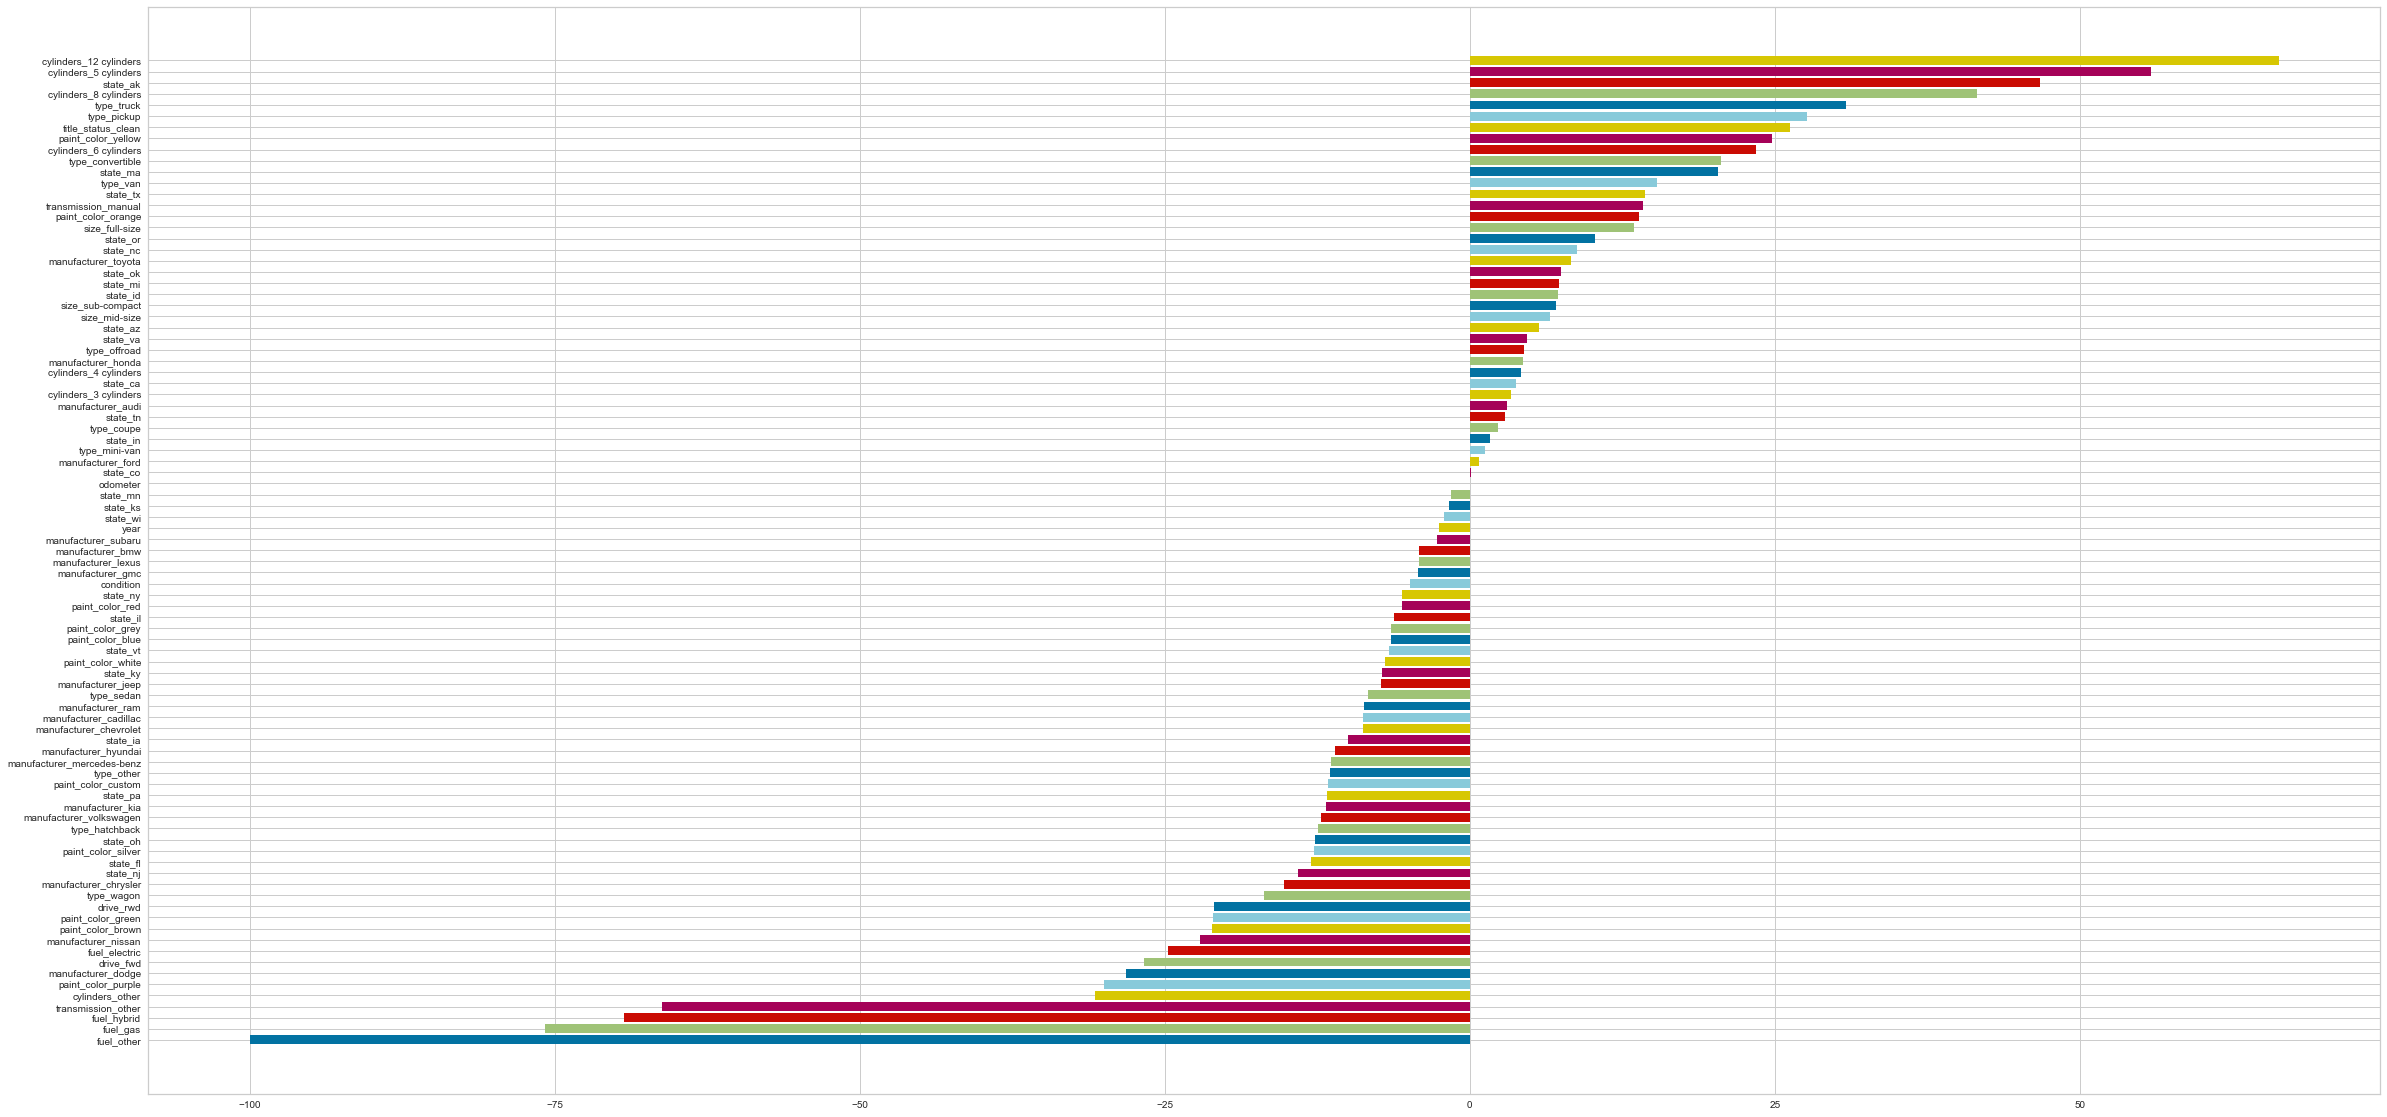

In [103]:

plt.figure(figsize=[40,20])

ax = FeatureImportances(ridgereg, relative=True)

ax.fit(X_train_encoded,y_train)


## Machine Learning Pipeline

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2592, 13), (649, 13), (2592,), (649,))

In [105]:
X_train.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
2936,2004,jaguar,like new,8 cylinders,gas,141815,clean,automatic,rwd,full-size,sedan,black,sc
840,2010,volkswagen,excellent,4 cylinders,gas,97000,clean,automatic,fwd,compact,coupe,red,ia
1174,2014,nissan,excellent,4 cylinders,gas,34761,clean,automatic,fwd,full-size,sedan,brown,al
1618,2008,toyota,good,6 cylinders,gas,177138,clean,automatic,4wd,full-size,SUV,grey,mn
2656,2004,ram,good,6 cylinders,gas,98000,clean,manual,rwd,full-size,truck,white,oh


In [106]:
X_test.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
2330,2018,chevrolet,like new,4 cylinders,gas,29051,clean,manual,rwd,full-size,coupe,red,nc
1278,2011,chevrolet,excellent,6 cylinders,gas,125560,clean,automatic,fwd,mid-size,sedan,brown,pa
2519,2007,chevrolet,good,6 cylinders,gas,132666,clean,automatic,fwd,mid-size,SUV,grey,in
321,2011,mercedes-benz,excellent,6 cylinders,gas,86960,clean,automatic,4wd,compact,sedan,silver,il
2841,2007,dodge,good,4 cylinders,gas,142000,clean,automatic,fwd,mid-size,wagon,orange,pa


In [107]:
X_train["year"]=2022-X_train["year"]
X_test["year"]=2022-X_test["year"]
X_train.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
2936,18,jaguar,like new,8 cylinders,gas,141815,clean,automatic,rwd,full-size,sedan,black,sc
840,12,volkswagen,excellent,4 cylinders,gas,97000,clean,automatic,fwd,compact,coupe,red,ia
1174,8,nissan,excellent,4 cylinders,gas,34761,clean,automatic,fwd,full-size,sedan,brown,al
1618,14,toyota,good,6 cylinders,gas,177138,clean,automatic,4wd,full-size,SUV,grey,mn
2656,18,ram,good,6 cylinders,gas,98000,clean,manual,rwd,full-size,truck,white,oh


In [108]:
X_test.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
2330,4,chevrolet,like new,4 cylinders,gas,29051,clean,manual,rwd,full-size,coupe,red,nc
1278,11,chevrolet,excellent,6 cylinders,gas,125560,clean,automatic,fwd,mid-size,sedan,brown,pa
2519,15,chevrolet,good,6 cylinders,gas,132666,clean,automatic,fwd,mid-size,SUV,grey,in
321,11,mercedes-benz,excellent,6 cylinders,gas,86960,clean,automatic,4wd,compact,sedan,silver,il
2841,15,dodge,good,4 cylinders,gas,142000,clean,automatic,fwd,mid-size,wagon,orange,pa


In [109]:
ridge_pipeline_used_car=Pipeline([
    
    ("encoder_rare_label",rare_label.RareLabelEncoder(tol=0.05,n_categories=7,ignore_format=True, variables=["manufacturer","state","title_status"])),
    
    ("encoder_rare_label_",rare_label.RareLabelEncoder(tol=0.05, n_categories=7, ignore_format=True,variables=["title_status"],replace_with='NotClean')),  
    
    ("categorical_encoder",OrdinalEncoder(encoding_method='ordered',ignore_format=True,variables=['condition'])),
    
    ("categorical_encoder_",OneHotEncoder(ignore_format=True,drop_last=False)),("MinMax", MinMaxScaler()),
    
    ("ridgemodel",Ridge())])

In [110]:
ridge_pipeline_used_car.fit(X_train,y_train)

Pipeline(steps=[('encoder_rare_label',
                 RareLabelEncoder(ignore_format=True, n_categories=7,
                                  variables=['manufacturer', 'state',
                                             'title_status'])),
                ('encoder_rare_label_',
                 RareLabelEncoder(ignore_format=True, n_categories=7,
                                  replace_with='NotClean',
                                  variables=['title_status'])),
                ('categorical_encoder',
                 OrdinalEncoder(ignore_format=True, variables=['condition'])),
                ('categorical_encoder_', OneHotEncoder(ignore_format=True)),
                ('MinMax', MinMaxScaler()), ('ridgemodel', Ridge())])

In [111]:
ridge_preds=ridge_pipeline_used_car.predict(X_test)
r2_score(y_test,ridge_preds)

0.6496754037953765

**Perform Grid Search for best parameters for Ridge Regressor**

In [112]:
#check for all the parameters for the ridge regression pipeline

ridge_pipeline_used_car.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'encoder_rare_label', 'encoder_rare_label_', 'categorical_encoder', 'categorical_encoder_', 'MinMax', 'ridgemodel', 'encoder_rare_label__ignore_format', 'encoder_rare_label__max_n_categories', 'encoder_rare_label__n_categories', 'encoder_rare_label__replace_with', 'encoder_rare_label__tol', 'encoder_rare_label__variables', 'encoder_rare_label___ignore_format', 'encoder_rare_label___max_n_categories', 'encoder_rare_label___n_categories', 'encoder_rare_label___replace_with', 'encoder_rare_label___tol', 'encoder_rare_label___variables', 'categorical_encoder__encoding_method', 'categorical_encoder__errors', 'categorical_encoder__ignore_format', 'categorical_encoder__variables', 'categorical_encoder___drop_last', 'categorical_encoder___drop_last_binary', 'categorical_encoder___ignore_format', 'categorical_encoder___top_categories', 'categorical_encoder___variables', 'MinMax__clip', 'MinMax__copy', 'MinMax__feature_range', 'ridgemodel__alpha', 'ridgem

In [113]:
# Define the parameter grid to be used in GridSearch
parameters = {'ridgemodel__alpha': np.arange(0, 1, 0.05)}

In [114]:
# define the grid search
ridge_grid_search= GridSearchCV(ridge_pipeline_used_car, parameters, scoring='neg_mean_squared_error',cv=5,verbose=1, n_jobs=-1)

In [115]:
 #fit the grid search
ridge_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder_rare_label',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=7,
                                                         variables=['manufacturer',
                                                                    'state',
                                                                    'title_status'])),
                                       ('encoder_rare_label_',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=7,
                                                         replace_with='NotClean',
                                                         variables=['title_status'])),
                                       ('categorical_encoder',
                                        OrdinalEncoder(ignore_format=True,
                                                       variables=['condition'])),
                                       ('categorical_encoder_',
                                        OneHotEncoder(ignore_format=True)),
                                       ('MinMax', MinMaxScaler()),
                                       ('ridgemodel', Ridge())]),
             n_jobs=-1,
             param_grid={'ridgemodel__alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_squared_error', verbose=1)

In [116]:
# best estimator
print(ridge_grid_search.best_estimator_)

Pipeline(steps=[('encoder_rare_label',
                 RareLabelEncoder(ignore_format=True, n_categories=7,
                                  variables=['manufacturer', 'state',
                                             'title_status'])),
                ('encoder_rare_label_',
                 RareLabelEncoder(ignore_format=True, n_categories=7,
                                  replace_with='NotClean',
                                  variables=['title_status'])),
                ('categorical_encoder',
                 OrdinalEncoder(ignore_format=True, variables=['condition'])),
                ('categorical_encoder_', OneHotEncoder(ignore_format=True)),
                ('MinMax', MinMaxScaler()), ('ridgemodel', Ridge(alpha=0.45))])


In [117]:
# best model
ridge_best_model = ridge_grid_search.best_estimator_ 

In [118]:
ridge_best_model.fit(X,y) 

Pipeline(steps=[('encoder_rare_label',
                 RareLabelEncoder(ignore_format=True, n_categories=7,
                                  variables=['manufacturer', 'state',
                                             'title_status'])),
                ('encoder_rare_label_',
                 RareLabelEncoder(ignore_format=True, n_categories=7,
                                  replace_with='NotClean',
                                  variables=['title_status'])),
                ('categorical_encoder',
                 OrdinalEncoder(ignore_format=True, variables=['condition'])),
                ('categorical_encoder_', OneHotEncoder(ignore_format=True)),
                ('MinMax', MinMaxScaler()), ('ridgemodel', Ridge(alpha=0.45))])

In [119]:
ridge_grid_search.best_score_

-57568635.2857453

In [120]:
ridge_grid_search.best_params_

{'ridgemodel__alpha': 0.45}

In [121]:
print(("best score from grid search: %.3f" % ridge_best_model.score(X_train, y_train)))

best score from grid search: 0.646


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

###  Improving GridSearch Performance using experimental features in Scikit Learn
**Searching for optimal parameters with successive halving. **
**Reference: https://scikit-learn.org/stable/modules/grid_search.html **

In [122]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [123]:
params_Ridge = {'ridgemodel__alpha': np.arange(0, 1, 0.05) , 'ridgemodel__fit_intercept': [True, False], 'ridgemodel__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [124]:
# Define the parameter grid to be used in GridSearch
#parameters = {'ridgemodel__alpha': np.arange(0, 1, 0.05),}

In [125]:
# define the grid search
ridge_halving_grid_search= HalvingGridSearchCV(ridge_pipeline_used_car, params_Ridge, scoring="roc_auc", verbose=1,n_jobs=-1, min_resources="exhaust", factor=3)

In [126]:
#fit the grid search
ridge_halving_grid_search.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 32
max_resources_: 2592
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 240
n_resources: 32
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
----------
iter: 1
n_candidates: 80
n_resources: 96
Fitting 5 folds for each of 80 candidates, totalling 400 fits
----------
iter: 2
n_candidates: 27
n_resources: 288
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 3
n_candidates: 9
n_resources: 864
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 4
n_candidates: 3
n_resources: 2592
Fitting 5 folds for each of 3 candidates, totalling 15 fits


HalvingGridSearchCV(estimator=Pipeline(steps=[('encoder_rare_label',
                                               RareLabelEncoder(ignore_format=True,
                                                                n_categories=7,
                                                                variables=['manufacturer',
                                                                           'state',
                                                                           'title_status'])),
                                              ('encoder_rare_label_',
                                               RareLabelEncoder(ignore_format=True,
                                                                n_categories=7,
                                                                replace_with='NotClean',
                                                                variables=['title_status'])),
                                              ('categorical_encoder',
                                               OrdinalEncoder(ignore_format=...
                                              ('ridgemodel', Ridge())]),
                    n_jobs=-1,
                    param_grid={'ridgemodel__alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                'ridgemodel__fit_intercept': [True, False],
                                'ridgemodel__solver': ['svd', 'cholesky',
                                                       'lsqr', 'sparse_cg',
                                                       'sag', 'saga']},
                    refit=<function _refit_callable at 0x00000277252552F0>,
                    scoring='roc_auc', verbose=1)

In [127]:
ridge_halving_grid_search.best_params_

{'ridgemodel__alpha': 0.1,
 'ridgemodel__fit_intercept': True,
 'ridgemodel__solver': 'sag'}

In [128]:
# best model
ridge_halving_best_model = ridge_halving_grid_search.best_estimator_

In [129]:
ridge_halving_best_model.fit(X,y)

Pipeline(steps=[('encoder_rare_label',
                 RareLabelEncoder(ignore_format=True, n_categories=7,
                                  variables=['manufacturer', 'state',
                                             'title_status'])),
                ('encoder_rare_label_',
                 RareLabelEncoder(ignore_format=True, n_categories=7,
                                  replace_with='NotClean',
                                  variables=['title_status'])),
                ('categorical_encoder',
                 OrdinalEncoder(ignore_format=True, variables=['condition'])),
                ('categorical_encoder_', OneHotEncoder(ignore_format=True)),
                ('MinMax', MinMaxScaler()),
                ('ridgemodel', Ridge(alpha=0.1, solver='sag'))])

In [130]:
ridge_halving_train_preds=ridge_halving_best_model.predict(X_train)

In [131]:
ridge_halving_test_preds=ridge_halving_best_model.predict(X_test)

In [132]:
print(("Best score for Ridge regression from halving grid search: %.3f" % ridge_halving_best_model.score(X_train, y_train)))

Best score for Ridge regression from halving grid search: 0.671


In [133]:
#Print the coeffecients
coefs = ridge_pipeline_used_car.named_steps.ridgemodel.coef_
coefs

array([-7228.87472415, -3413.8449269 ,  1791.69625741, ...,
       -1810.92743769,  1296.18472653,   228.8618805 ])

In [134]:
#Print the coeffecients from gridsearch
coefs = ridge_halving_grid_search.best_estimator_.named_steps.ridgemodel.coef_
print(coefs)

[-6822.8684434   1314.60878495 -4005.88877489 ...    -7.36824184
     7.15632931  1293.30120484]


In [135]:
ridge_halving_grid_search.n_features_in_

13

In [136]:
ridge_halving_grid_search.score

<bound method BaseSearchCV.score of HalvingGridSearchCV(estimator=Pipeline(steps=[('encoder_rare_label',
                                               RareLabelEncoder(ignore_format=True,
                                                                n_categories=7,
                                                                variables=['manufacturer',
                                                                           'state',
                                                                           'title_status'])),
                                              ('encoder_rare_label_',
                                               RareLabelEncoder(ignore_format=True,
                                                                n_categories=7,
                                                                replace_with='NotClean',
                                                                variables=['title_status'])),
                                             

In [137]:
ridge_halving_grid_search.cv_results_

{'iter': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1

In [138]:
def plot_ridge_halving_grid_search_results(cv_results, param_x, param_z, metric='mean_test_score'):
 
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

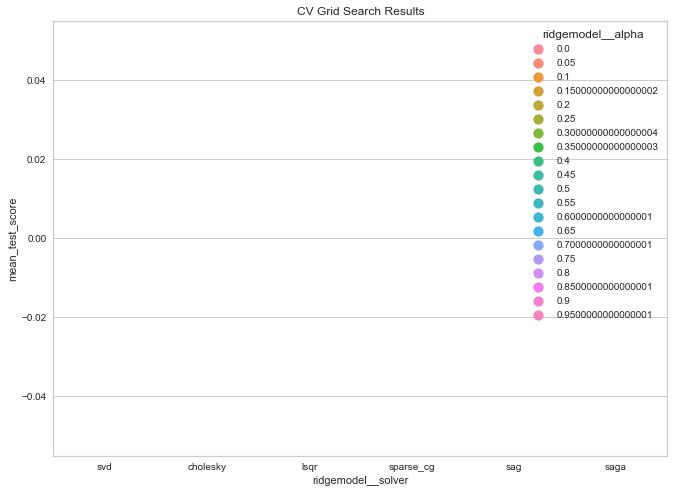

In [139]:
fig = plot_ridge_halving_grid_search_results(ridge_halving_grid_search.cv_results_,  'ridgemodel__solver','ridgemodel__alpha')

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Backend method for WebApps to enter user data and return used car price predictions

**Create a function to enter the used car parameters for price prediction.  This would be the backend function called by a web app to retreive and present the price to the end user **

In [140]:
def predicted_price(year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state):
     
    vehicle={'price':[int(float(0.00))],'year':[(2022-int(float(year)))],'manufacturer':[manufacturer],'condition':[condition],'cylinders':[cylinders],'fuel':[fuel],'odometer':[odometer],'title_status':[title_status],'transmission':[transmission],'drive':[drive],'size':[size],'type':[type],'paint_color':[paint_color],'state':[state]}
    
    vehicle=pd.DataFrame(vehicle)
    
    X=vehicle.drop(columns=["price"])
    
            
    used_car_price=ridge_halving_best_model.predict(X)
    
    used_car_price=used_car_price[0].round(2)
    
    print("The Estimated price for this used car is: $", used_car_price)
    return 

**Basic Syntax for entering predictions via notebook cell to view predictions**

In [141]:
predicted_price(2018,'chevrolet','like new','8 cylinders','gas','29051','clean','manual','rwd ','full-size','coupe','red','nc')

The Estimated price for this used car is: $ 19499.79


In [142]:
predicted_price(2014,'toyota','like new','4 cylinders','gas','25000','clean','automatic','rwd ','full-size','coupe','red','ca')

The Estimated price for this used car is: $ 16481.88


In [143]:
predicted_price(2006,'toyota','good','4 cylinders','gas','50000','clean','automatic','rwd ','full-size','coupe','red','pa')

The Estimated price for this used car is: $ 12854.96


### Conclusion: 

**Ridge Regression gave the best performance of all the regression models tried.  year, odometer, make, drive, fuel, manufacturer, cylinders are the features that have the most significance in deciding the price of a used car. Location and paint color are other factors that come into play in deciding the price of a used car** 

### Limitations of the current project and Scope for future improvement:

**1. This project considered standard variations of regression models. Newer and faster techniques like Extreme Gradient Boosting (XGBoost) provides an efficient and effective implementation of the gradient boosting algorithm that can be used for regression predictive modeling. Other regressors we should consider is the LightGBM Classifier and Regressor as it has been known to do well with datasets with large amount of categorical variables.                                                     2. Hyperparameter tuning coupled with the use of XGboost regressor should improve the current performance of this model.       3. Due to lack of time a suitable webapp frontend was not developed to make this user friendly and deployable                                                    4.  The total number of observations used was only 42688. This is a relatively small dataset for making a strong inference because I have used only a sampling of the dataset available to build a model with reasonable accuracy. More data should definitely provide robust and improved predictions.                                                                            5. Use of additional features could potentially improve model performance. Polynomial processing in the pipeline stage was not tried.                                                                                                                          6. The data transformation stage of the pipeline could involve more transformers and imputers. Some of the numerical features could be converted to ordinal form. Different scaling transformer can be also be tried to boost the  prediction power of models**